Prediction: I will be predicting 'salary_usd' and training a model to do so.

Streamlit App Name: JobIntuition

Purpose: I recognise that individuals may often feel confused or overwhelmed by the ever changing job market of AI. This might make them feel unsure of their worth and shortchange them of their talents.

Mission: My Mission is to empower individuals using data to bring clarity, fairness, and confidence to salary expectations in the global AI job market.I will harness the power of machine learning to uncover real-time, personalized salary predictions so that you can stop guessing your worth and start making smarter, more informed career decisions.

Data Loading:

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ai_job_dataset.csv')
df

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics


After importing the libraries and estracting out the dataset. I will be doing Data Inspection.

Missing Values Calculation

In [134]:
print("Missing values for each column:")
df.isnull().sum()
## Check for any null data inside the dataset.


Missing values for each column:


job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

No missing values for any of the columns

# Check all the datatypes of each column.

In [135]:
df.dtypes
# This is to help as a reference when needing to perform One Hot Encoding Later

job_id                     object
job_title                  object
salary_usd                  int64
salary_currency            object
experience_level           object
employment_type            object
company_location           object
company_size               object
employee_residence         object
remote_ratio                int64
required_skills            object
education_required         object
years_experience            int64
industry                   object
posting_date               object
application_deadline       object
job_description_length      int64
benefits_score            float64
company_name               object
dtype: object

I notice that there are alot of objects so converting them to numerical is important for model prediction.

In [136]:
df.nunique()
# Look at how many unique values each column has.

job_id                    15000
job_title                    20
salary_usd                14315
salary_currency               3
experience_level              4
employment_type               4
company_location             20
company_size                  3
employee_residence           20
remote_ratio                  3
required_skills           13663
education_required            4
years_experience             20
industry                     15
posting_date                486
application_deadline        543
job_description_length     2000
benefits_score               51
company_name                 16
dtype: int64

Some columns have alot of unique values, especially those that are objects which need to be encoded later. Must be careful of cardinality rate.

In [137]:
df.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


After importing the libraries and estracting out the dataset. I will be doing Data Cleaning.

# Explaratory Data Analysis

1) Univariate Analysis

Firstly, I want to see the distribution of my prediction target, 'salary_usd' 

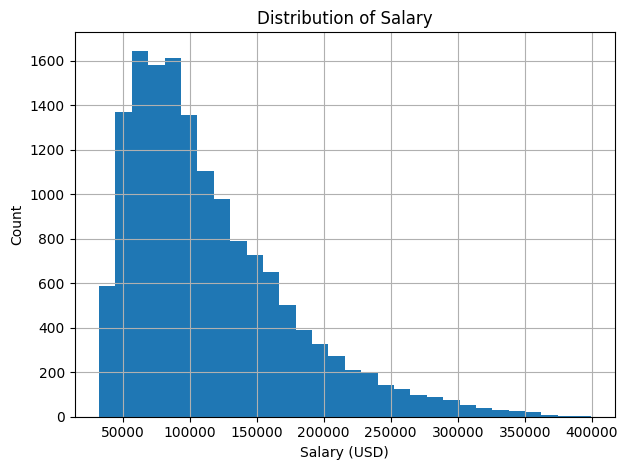

In [138]:
salary_hist= df.hist(column='salary_usd', bins=30)

sh = salary_hist[0]

sh[0].set_xlabel('Salary (USD)')
sh[0].set_ylabel('Count')
sh[0].set_title('Distribution of Salary')

plt.tight_layout()
plt.show()


What I can see is that salary_usd is positively/right skewed. This tells me that most people working in AI job sectors have salaries around 75,000 USD. The number of people with higher incomes, exponentially decreases subsequently.

Next, I am going to find outliers in salary usd which is my target predict variable.

I will take into account several factors when deciding to remove them.
1. Obvious data entry error
2. Very rare but valid cases	
3. Outliers dominate model loss (in regression)	
4. Outliers add noise and reduce generalization	
5. Outliers are informative for your use case	

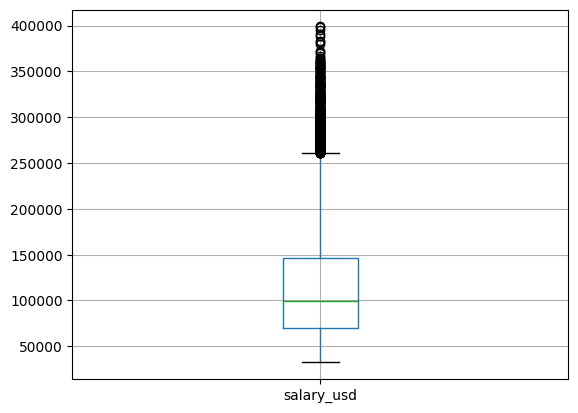

In [139]:
df.boxplot('salary_usd')
plt.show()

In [140]:
# Calculate IQR-based upper bound
Q1 = df['salary_usd'].quantile(0.25)
Q3 = df['salary_usd'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Filter outliers above the upper bound
outliers = df[df['salary_usd'] > upper_bound]

# Sort and display top 10 highest outliers
top_10_outliers = outliers.sort_values(by='salary_usd', ascending=False).head(10)
print(top_10_outliers[['salary_usd', 'company_location','years_experience']])


       salary_usd company_location  years_experience
9891       399095      Switzerland                10
2309       398084      Switzerland                15
12499      394917      Switzerland                12
12803      390292      Switzerland                11
317        388754      Switzerland                16
5483       383142      Switzerland                12
10468      381575      Switzerland                10
9637       379418          Denmark                13
8377       372206      Switzerland                19
14431      371087      Switzerland                13


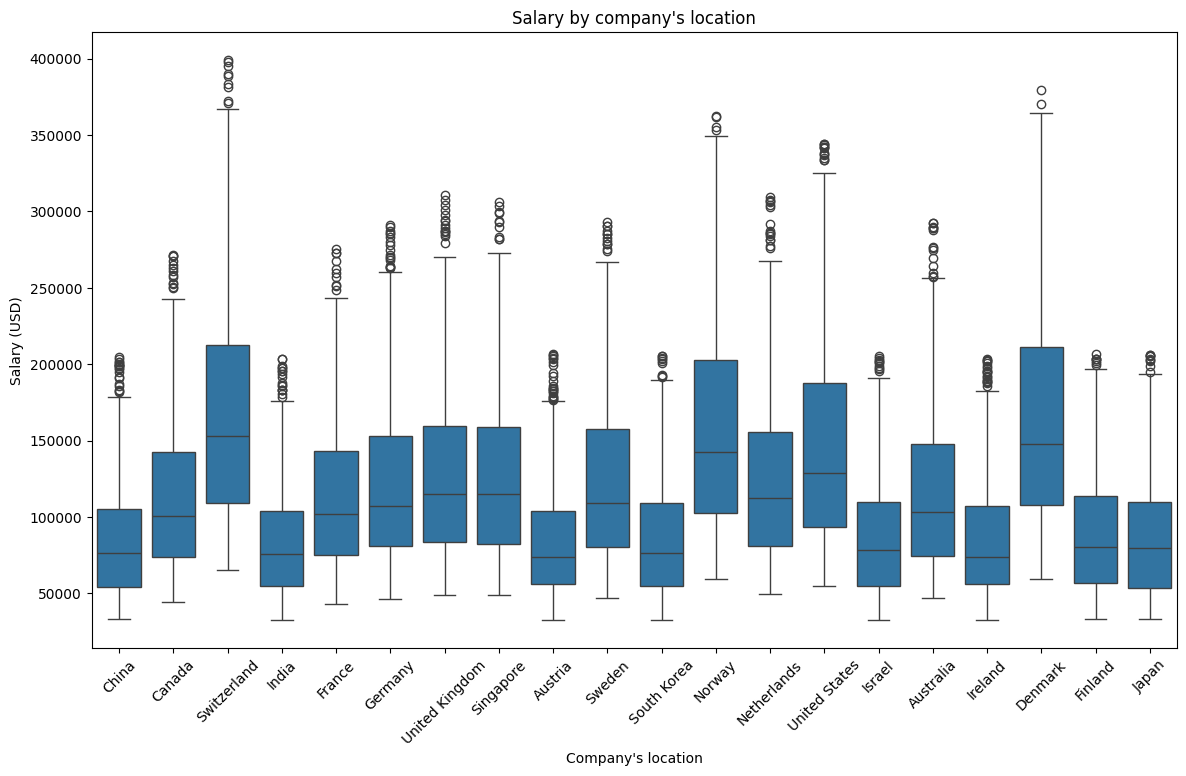

In [141]:
plt.figure(figsize=(14, 8))

sns.boxplot(data=df, x='company_location', y='salary_usd')
plt.title("Salary by company's location")
plt.xlabel("Company's location")
plt.ylabel("Salary (USD)")
plt.xticks(rotation=45)

plt.show()


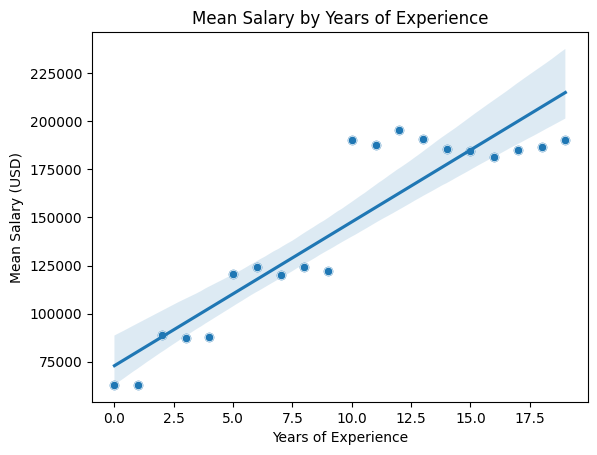

In [142]:
mean_df = df.groupby('years_experience')['salary_usd'].mean().reset_index()

sns.regplot(data=mean_df, x='years_experience', y='salary_usd', scatter=True)

sns.scatterplot(data=mean_df, x='years_experience', y='salary_usd')

plt.title("Mean Salary by Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Mean Salary (USD)")
plt.show()

These outliers for salary makes sense. As when we check the box plot, switzerland and denmark has the highest mean and outlier salaries for ai jobs. This shows that the outliers are important and reasonable to keep into the dataset. 

Not only that, they also have high years of experience which when checking the scatterplot shows high positive correlations with mean salary. 

Hence, I am not surprised by the outliers as they are both in highly paid countries and the person has many years of experience.I shall not remove them.

# Affect on performance
Without removing the top 10 salary outliers: 
| Model             | MAE      | RMSE     |
| ----------------- | -------- | -------- |
| Linear Regression | 18027.21 | 24987.16 |
| Decision Tree     | 19468.20 | 28805.47 |
| Random Forest     | 14939.15 | 21267.31 |
| Gradient Boosting | 14989.37 | 21070.41 |
| Extra Trees       | 16897.49 | 24929.33 |


df_sorted = df.sort_values(by='salary_usd', ascending=False)

Remove the top 10 highest salary rows

df_no_top10 = df_sorted.iloc[10:]  # keeps all rows except top 10
(After training, everything unchanged.)

After removing the top 10 salary outliers: 

| Model             | MAE      | RMSE     |
| ----------------- | -------- | -------- |
| Linear Regression | 18027.21 | 24987.16 |
| Decision Tree     | 19567.32 | 28864.25 |
| Random Forest     | 14958.52 | 21414.48 |
| Gradient Boosting | 14988.22 | 21069.08 |
| Extra Trees       | 16928.11 | 24935.02 |


# Conclusion:
From the comparison, I can see that removing the top 10 highest salary outliers doesnt have much impact on how well the models performed. Most of the MAE and RMSE values stayed almost the same. 

However, the Gradient Boosting Regresion model got slightly better (-1) after removing the outliers, while models like Decision Tree and Random Forest got a little bit worse.

Overall, the results didnt change much, so the outliers don’t seem to strongly affect the model. 
Hence, I would not remove them

Next, I will check the distribution of the categorical data to see if there is imbalance in the amount of values for experience level which can cause the model to be biased towards dominating types.


# Distribution of Experience level


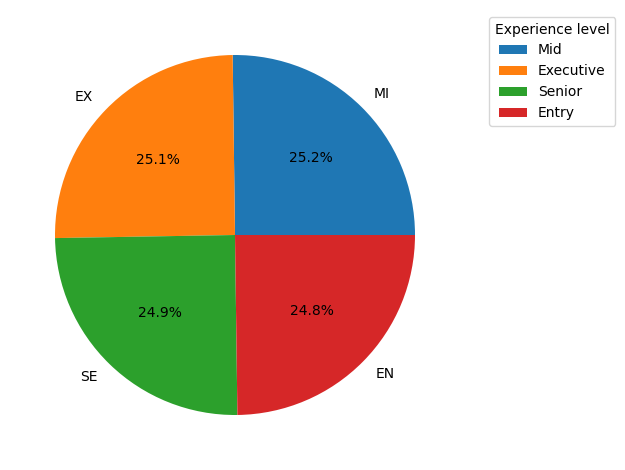

In [143]:
value_counts = df['experience_level'].value_counts()

custom_labels = {
    'EN': 'Entry',
    'MI': 'Mid',
    'SE': 'Senior',
    'EX': 'Executive'
}

value_counts.plot(kind='pie', autopct='%1.1f%%', ylabel='', legend=False)

legend_labels = [custom_labels.get(label, label) for label in value_counts.index]

plt.legend(labels=legend_labels, title='Experience level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Experience level are evenly distributed as they have around equal percentages for number of values for each Experience level, suggesting a balanced representation without dominance from any one category

# Distribution of job_title:

C:\Users\33ugl\AppData\Local\Temp\ipykernel_4228\3274761189.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df , y= 'job_title',order= df['job_title'].value_counts().index,palette='rainbow')


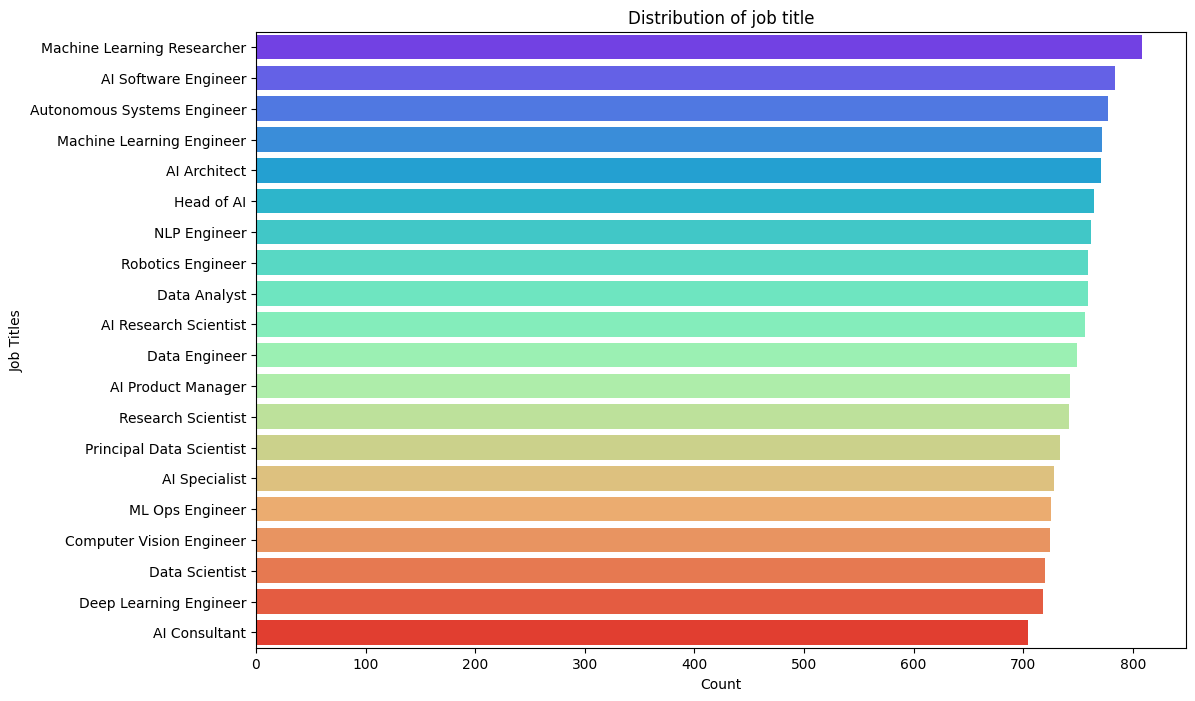

In [144]:
plt.figure(figsize=(12, 8))
sns.countplot(data= df , y= 'job_title',order= df['job_title'].value_counts().index,palette='rainbow')
plt.title("Distribution of job title")
plt.xlabel('Count')
plt.ylabel('Job Titles')
plt.tight_layout
plt.show()

The countplot reveals a relatively even distribution across job titles, suggesting that the job_title feature is well-balanced. This prevents the model from being skewed toward any particular job.


# Distribution of Employment Type:

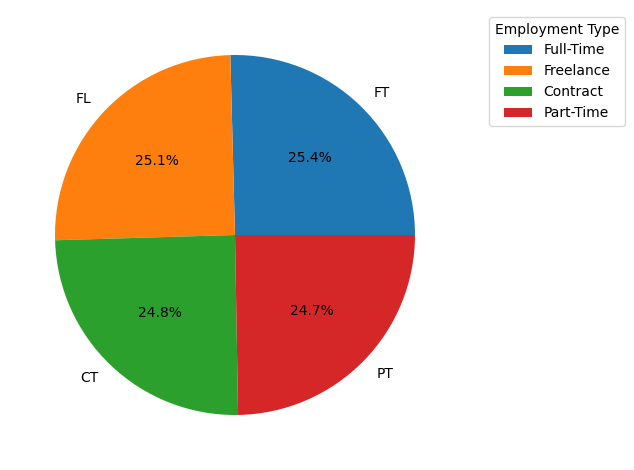

In [145]:
value_counts = df['employment_type'].value_counts()

custom_labels = {
    'FT': 'Full-Time',
    'PT': 'Part-Time',
    'CT': 'Contract',
    'FL': 'Freelance'
}

value_counts.plot(kind='pie', autopct='%1.1f%%', ylabel='', legend=False)

legend_labels = [custom_labels.get(label, label) for label in value_counts.index]

plt.legend(labels=legend_labels, title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Employment types are evenly distributed as they have around equal percentages for number of values for each employment type, suggesting a balanced representation without dominance from any one category

# Distribution of company location

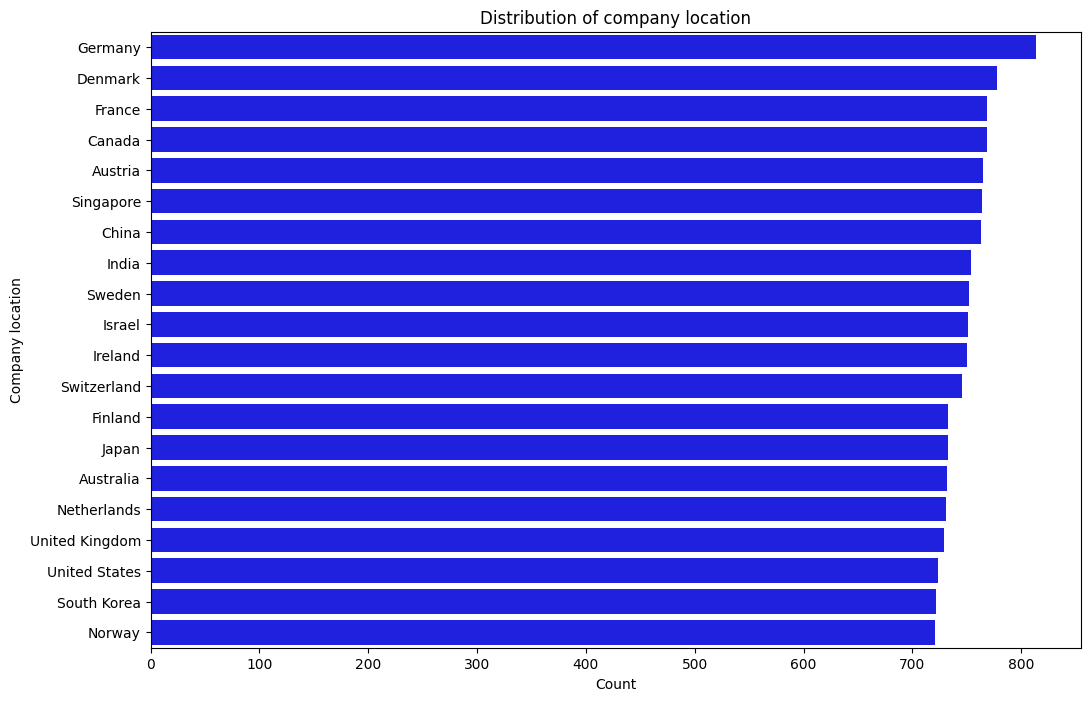

In [146]:
plt.figure(figsize=(12, 8))
sns.countplot(data= df , y= 'company_location',order= df['company_location'].value_counts().index,color='blue')
plt.title("Distribution of company location")
plt.xlabel('Count')
plt.ylabel('Company location')
plt.tight_layout
plt.show()

The countplot reveals a relatively even distribution across company location, suggesting that the company location feature is well-balanced. This prevents the model from being skewed toward any particular country.

# Distribution of company size

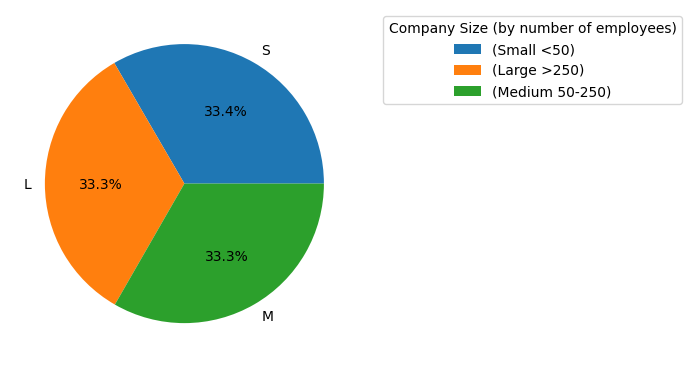

In [147]:
value_counts = df['company_size'].value_counts()

custom_labels = {
    'S': '(Small <50)',
    'M': '(Medium 50-250)',
    'L': '(Large >250)',
    
}

value_counts.plot(kind='pie', autopct='%1.1f%%', ylabel='', legend=False)

legend_labels = [custom_labels.get(label, label) for label in value_counts.index]

plt.legend(labels=legend_labels, title='Company Size (by number of employees)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Company Size are evenly distributed as they have around equal percentages for number of values for each company size, suggesting a balanced representation without dominance from any one category

# Distribution of employee residence

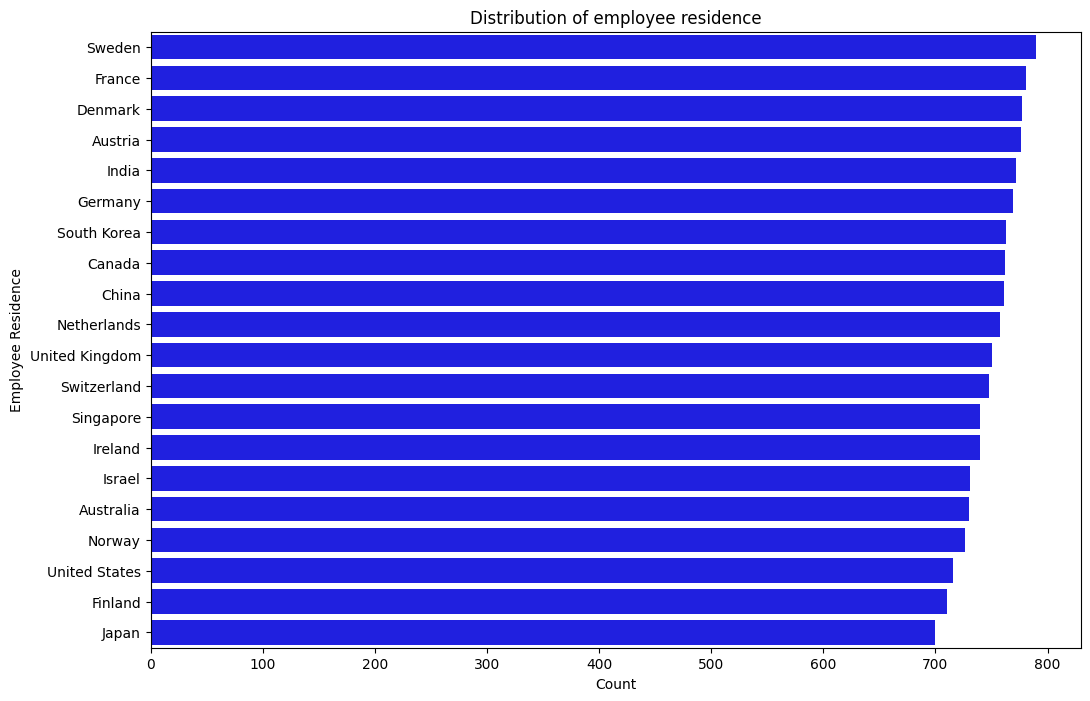

In [148]:
plt.figure(figsize=(12, 8))
sns.countplot(data= df , y= 'employee_residence',order= df['employee_residence'].value_counts().index,color='blue')
plt.title("Distribution of employee residence")
plt.xlabel('Count')
plt.ylabel('Employee Residence')
plt.tight_layout
plt.show()

The countplot reveals a relatively even distribution across employee residence, suggesting that the employee residence feature is well-balanced. This prevents the model from being skewed toward any particular country.

# Distribution for remote ratio

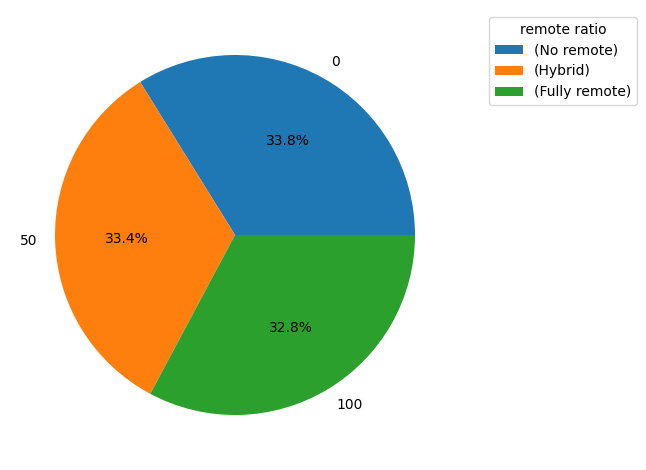

In [149]:
value_counts = df['remote_ratio'].value_counts()

custom_labels = {
    0: '(No remote)',
    50: '(Hybrid)',
    100: '(Fully remote)',
    
}

value_counts.plot(kind='pie', autopct='%1.1f%%', ylabel='', legend=False)

legend_labels = [custom_labels.get(label, label) for label in value_counts.index]

plt.legend(labels=legend_labels, title='remote ratio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Remote Ratio are evenly distributed as they have around equal percentages for number of values for each remote ratio, suggesting a balanced representation without dominance from any one category

# Distribution for education required

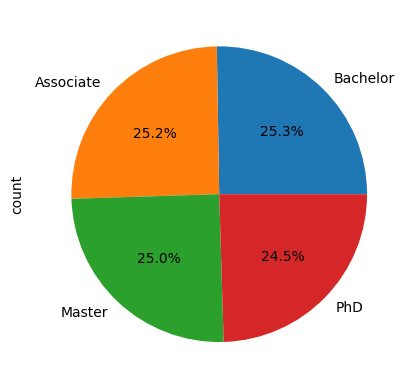

In [150]:
df['education_required'].value_counts().plot(kind='pie',autopct = '%1.1f%%')
plt.show()



Education required are evenly distributed as they have around equal percentages for number of values for each education, suggesting a balanced representation without dominance from any one category

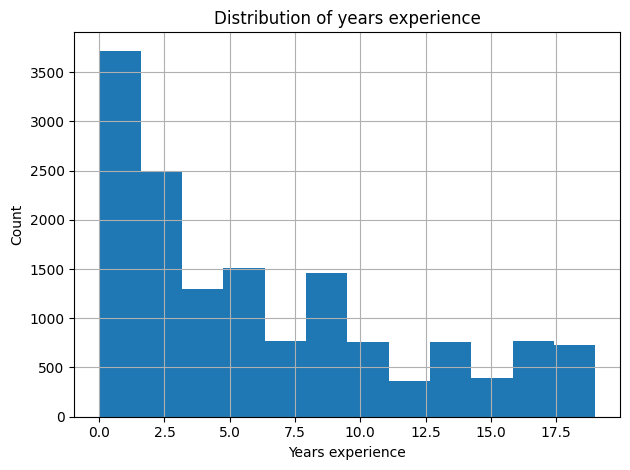

In [151]:
yearexp_hist= df.hist(column='years_experience', bins=12)

ye = yearexp_hist[0]

ye[0].set_xlabel('Years experience')
ye[0].set_ylabel('Count')
ye[0].set_title('Distribution of years experience')

plt.tight_layout()
plt.show()

# Distribution of industry

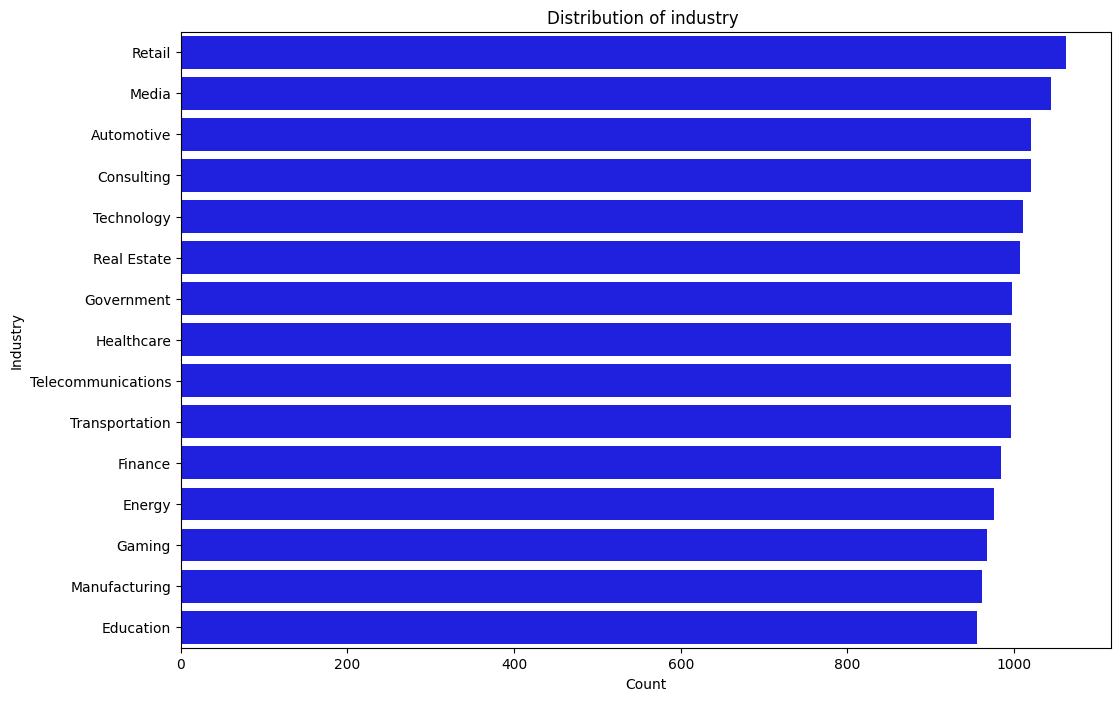

In [152]:
plt.figure(figsize=(12, 8))
sns.countplot(data= df , y= 'industry',order= df['industry'].value_counts().index,color='blue')
plt.title("Distribution of industry ")
plt.xlabel('Count')
plt.ylabel('Industry')
plt.tight_layout
plt.show()

The countplot reveals a relatively even distribution across industries, suggesting that the industry feature is well-balanced. This prevents the model from being skewed toward any particular industry.

# Distribution of companies

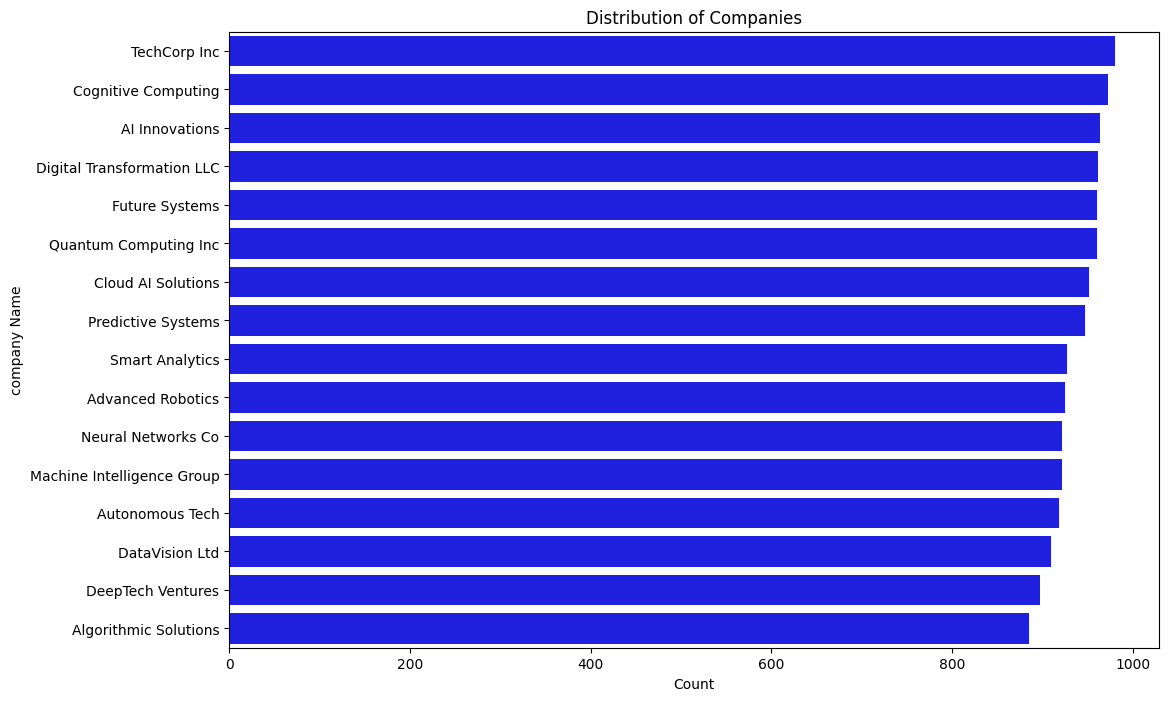

In [153]:
plt.figure(figsize=(12, 8))
sns.countplot(data= df , y= 'company_name',order= df['company_name'].value_counts().index,color='blue')
plt.title("Distribution of Companies")
plt.xlabel('Count')
plt.ylabel('company Name')
plt.tight_layout
plt.show()

The countplot reveals a relatively even distribution across the companies, suggesting that the company_name feature is well-balanced. This prevents the model from being skewed toward any particular company.

The countplot reveals a relatively even distribution across all industries, suggesting that the industry feature is well-balanced. This prevents the model from being skewed toward any particular industry.

# Bivariate analysis
Next, I will do analysis based on two or more variables to find relationships between them

# Numerical analysis

# Relationship between number of years of experience and salary

Text(0, 0.5, 'Mean Salary (USD)')

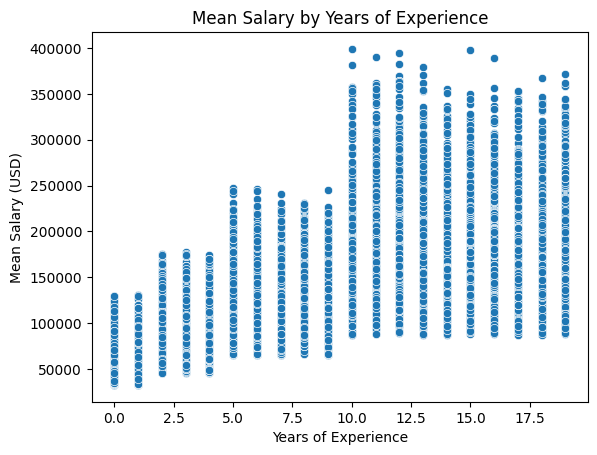

In [154]:
sns.scatterplot(data=df, x='years_experience', y='salary_usd')
plt.title("Mean Salary by Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Mean Salary (USD)")

This does not really tell me much useful information. i will try to get a mean salary usd for each years_experience so the raltionship can be seen much better

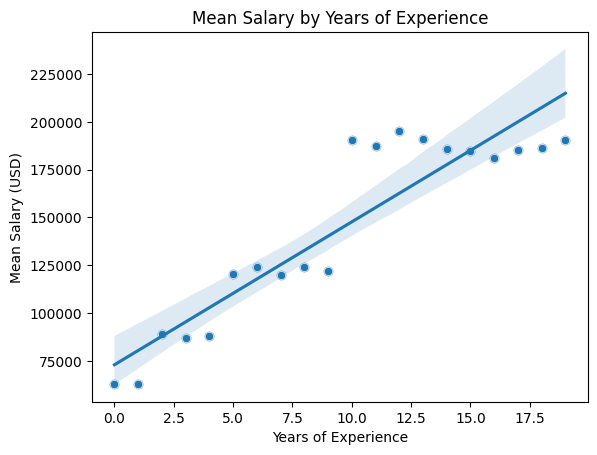

In [155]:
mean_df = df.groupby('years_experience')['salary_usd'].mean().reset_index()

sns.regplot(data=mean_df, x='years_experience', y='salary_usd', scatter=True)

sns.scatterplot(data=mean_df, x='years_experience', y='salary_usd')

plt.title("Mean Salary by Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Mean Salary (USD)")
plt.show()

What I can see is a positive linear relationship between the mean salary for given years of experience. The line shows that there is high correlation between the two relationships as well.

# Relationship between remote ratio and salary

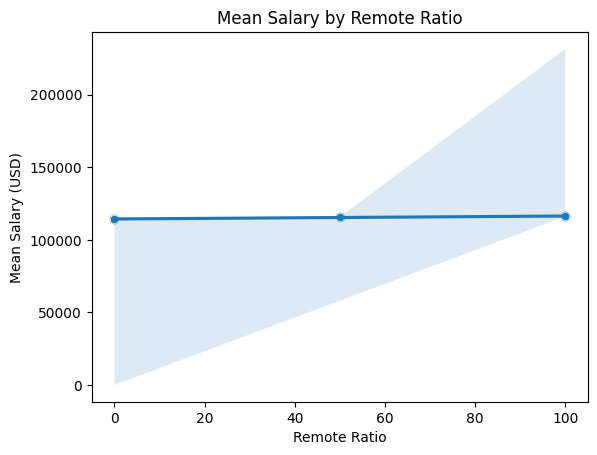

In [156]:
mean_df = df.groupby('remote_ratio')['salary_usd'].mean().reset_index()

sns.regplot(data=mean_df, x='remote_ratio', y='salary_usd', scatter=True)

sns.scatterplot(data=mean_df, x='remote_ratio', y='salary_usd')

plt.title("Mean Salary by Remote Ratio")
plt.xlabel("Remote Ratio")
plt.ylabel("Mean Salary (USD)")
plt.show()

There is no correlation between remote ratio and mean salary. The graph line is completely flat showing no relationship.

# Relationship between benefits score and salary

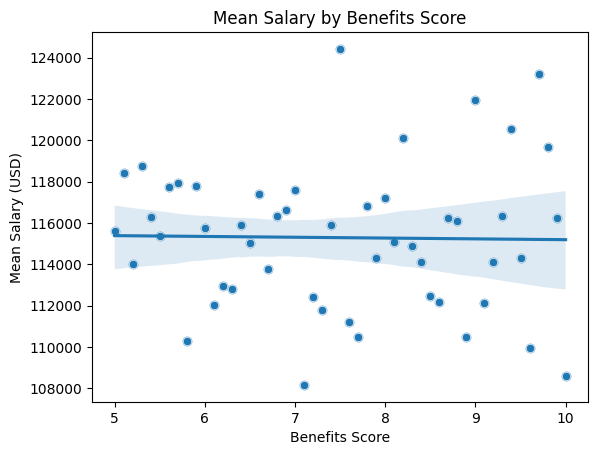

In [157]:
mean_df = df.groupby('benefits_score')['salary_usd'].mean().reset_index()

sns.regplot(data=mean_df, x='benefits_score', y='salary_usd', scatter=True)

sns.scatterplot(data=mean_df, x='benefits_score', y='salary_usd')

plt.title("Mean Salary by Benefits Score")
plt.xlabel("Benefits Score")
plt.ylabel("Mean Salary (USD)")
plt.show()

No/Negative correlation between salary and benefits score. The graph line is mostly flat.

In [158]:
df[['salary_usd', 'remote_ratio', 'years_experience', 'benefits_score']].corr()

,salary_usd,remote_ratio,years_experience,benefits_score
salary_usd,1.000000,0.013727,0.737556,0.000985
remote_ratio,0.013727,1.000000,0.015321,0.003139
years_experience,0.737556,0.015321,1.000000,-0.007275
benefits_score,0.000985,0.003139,-0.007275,1.000000


These  confirms that for numerical columns, years experience has very high correlation with salary while remote_ratio and benefits_score has no/low correlations

# Categorical analysis

# Relationship between Experience Level and salary

Text(0, 0.5, 'Salary (USD)')

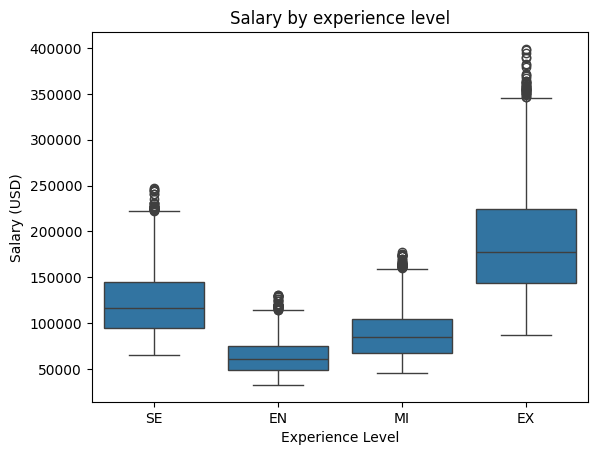

In [159]:
#Box plot with exp lvl
sns.boxplot(data=df, x='experience_level', y='salary_usd')
plt.title("Salary by experience level")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")


This tells me that there is correlation between experience level and salary usd . Their mean increases as the experience level increase in level. EN -> MI -> SE -> EX -> This also makes sense, hence it will be alsdo a useful variable for my model in predicting salary.

# Relationship between employment type and salary

Text(0, 0.5, 'Salary (USD)')

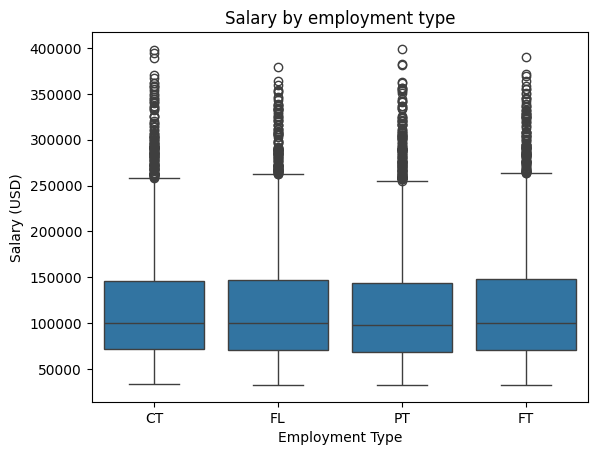

In [160]:
sns.boxplot(data=df, x='employment_type', y='salary_usd')
plt.title("Salary by employment type")
plt.xlabel("Employment Type")
plt.ylabel("Salary (USD)")

This shows and tells me that there is little correlation between employment type and salary.This is because their mean salary is relatively same for all employment types. Showing that employment type does not really affect salary.

# Relationship between company size and salary

Text(0, 0.5, 'Salary (USD)')

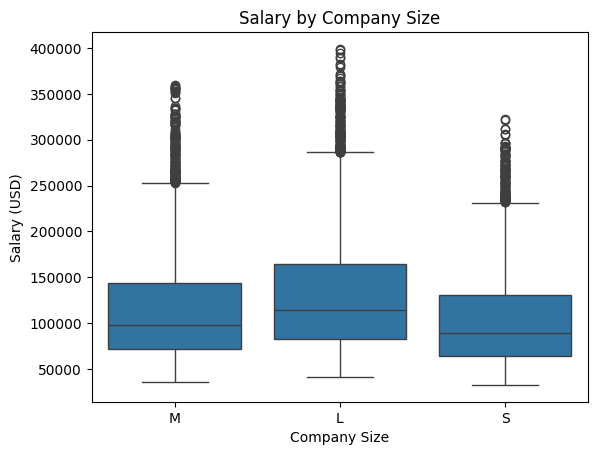

In [161]:
sns.boxplot(data=df, x='company_size', y='salary_usd')
plt.title("Salary by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Salary (USD)")

There is a positive correlation for company size and salary as the mean salary increases the bigger the company is L > M > S.

# Relationship between industry and salary

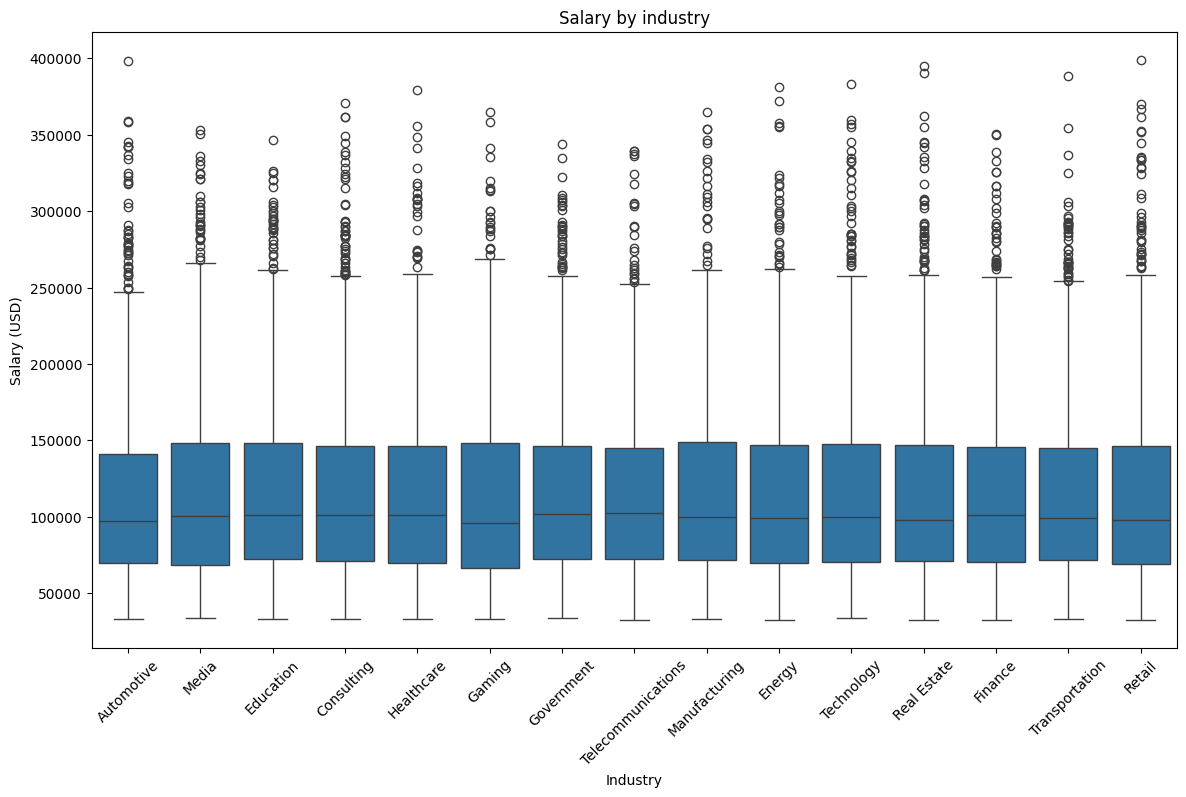

In [162]:
plt.figure(figsize=(14, 8))

sns.boxplot(data=df, x='industry', y='salary_usd')
plt.title("Salary by industry")
plt.xlabel("Industry")
plt.ylabel("Salary (USD)")
plt.xticks(rotation=45)

plt.show()

This tells me that there is little correlation between salary and each industry as most of the industry's mean salary stays the same.

# Relationship between salary and education requirements

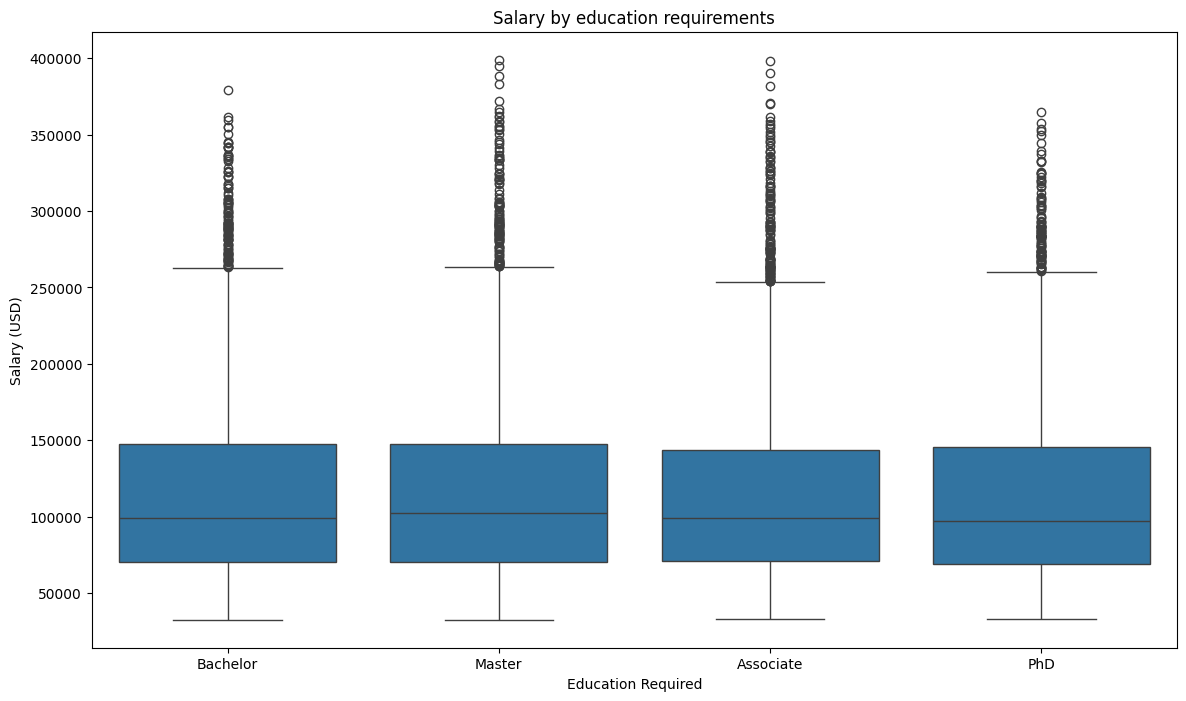

In [163]:
plt.figure(figsize=(14, 8))

sns.boxplot(data=df, x='education_required', y='salary_usd')
plt.title("Salary by education requirements")
plt.xlabel("Education Required")
plt.ylabel("Salary (USD)")
plt.show()

There is little relationship. This surprises me as this should be a big factor in the prediction of salaries. Maybe education required for feature importance will be more important.

# Relationship between salary and company location

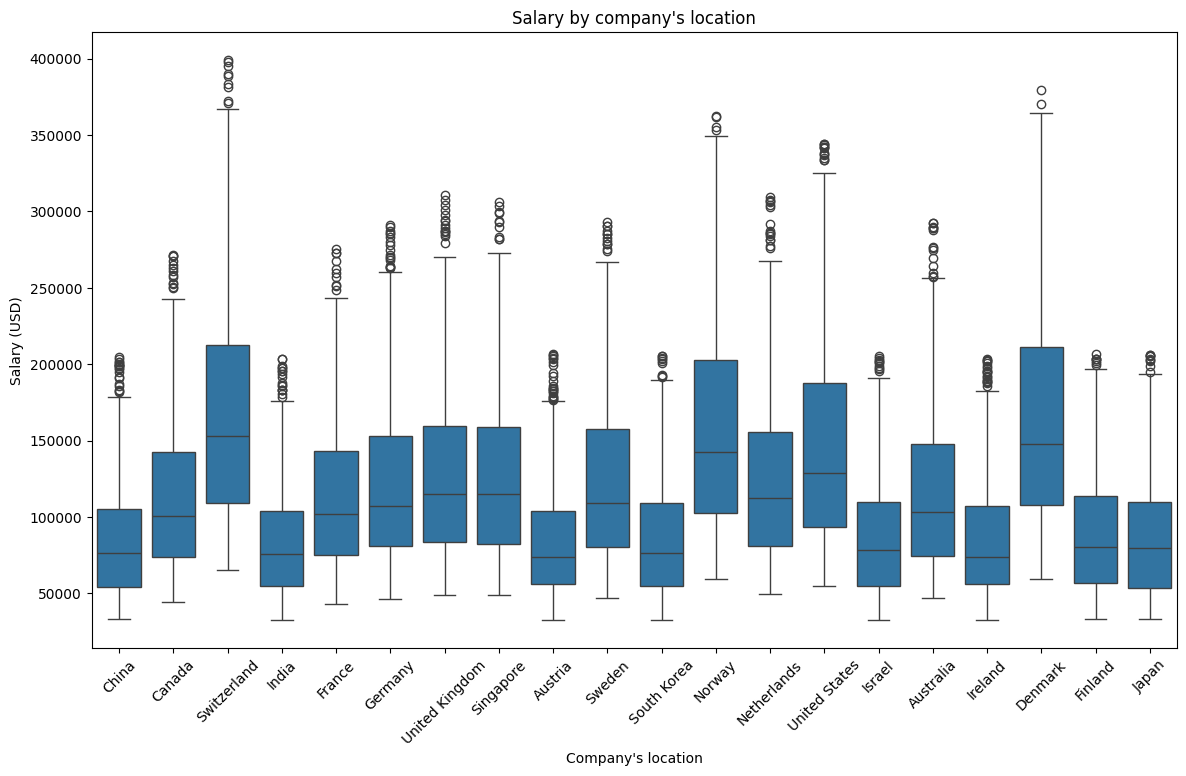

In [164]:
plt.figure(figsize=(14, 8))

sns.boxplot(data=df, x='company_location', y='salary_usd')
plt.title("Salary by company's location")
plt.xlabel("Company's location")
plt.ylabel("Salary (USD)")
plt.xticks(rotation=45)

plt.show()

I can see that since the mean salary for each country is varied, this means that there is a relationship between differing countries and salary.

# Relationship between salary and company name

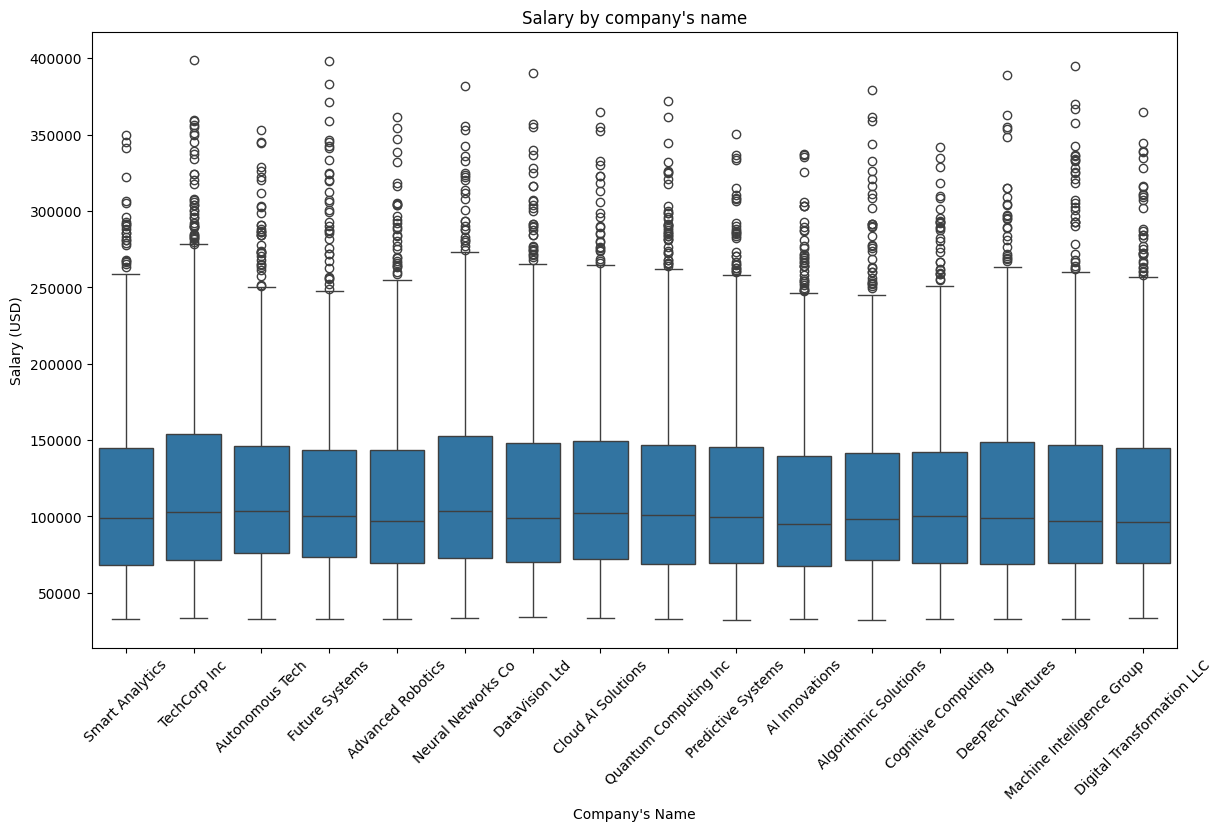

In [165]:
plt.figure(figsize=(14, 8))

sns.boxplot(data=df, x='company_name', y='salary_usd')
plt.title("Salary by company's name")
plt.xlabel("Company's Name")
plt.ylabel("Salary (USD)")
plt.xticks(rotation=45)

plt.show()

This shows me that there is not much of a relationship as the mean salaries are around the same.

# Relationship between employee residence and salary

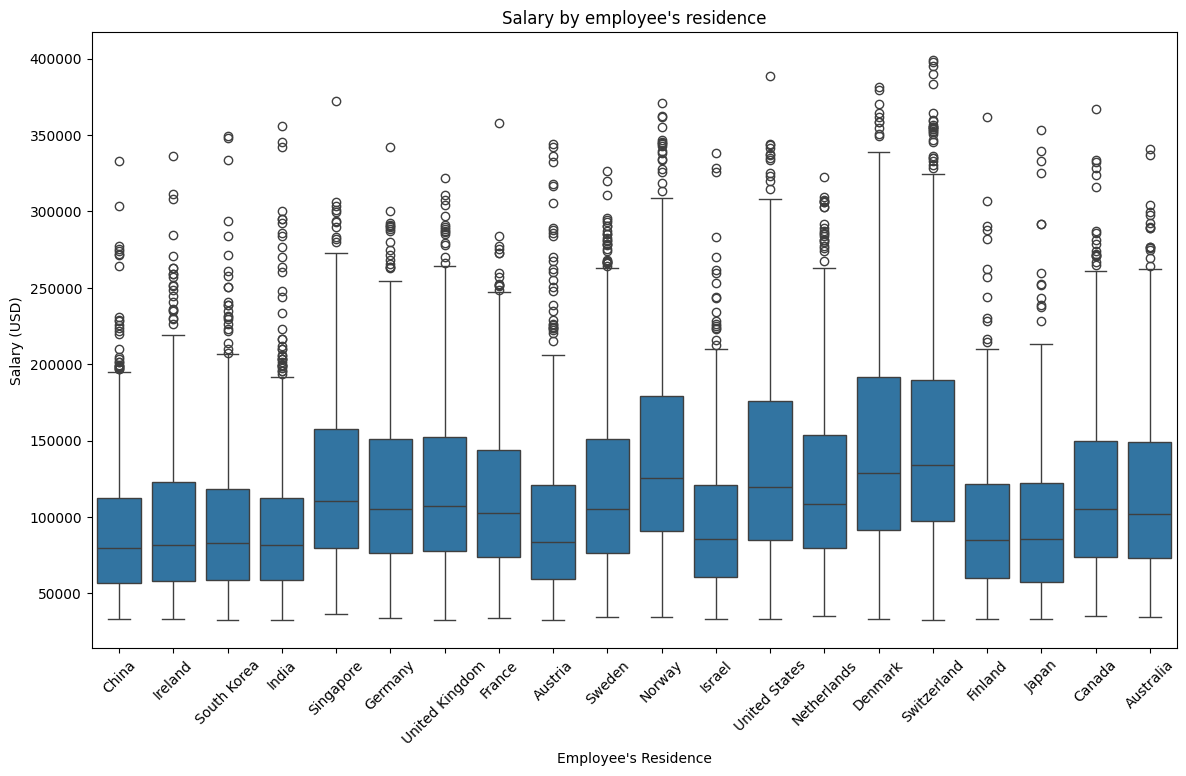

In [166]:
plt.figure(figsize=(14, 8))

sns.boxplot(data=df, x='employee_residence', y='salary_usd')
plt.title("Salary by employee's residence")
plt.xlabel("Employee's Residence")
plt.ylabel("Salary (USD)")
plt.xticks(rotation=45)

plt.show()

The mean salary for the different countries are varied. This means that there is a relationship between differing countries and salary.

# Relationship between job_title and salary
See what job_title has the highest mean salary. See if there are big differences between each job.

In [167]:
mean_salary_by_jobtitle = df.groupby('job_title')['salary_usd'].mean().sort_values(ascending=False)
print(mean_salary_by_jobtitle)

job_title
AI Specialist                  120570.758242
Machine Learning Engineer      118827.919689
Head of AI                     118542.968627
AI Research Scientist          117897.925926
AI Architect                   117436.513619
Robotics Engineer              116470.793149
Principal Data Scientist       116305.219346
Research Scientist             116066.502695
Data Engineer                  115970.720961
Data Scientist                 115819.008333
ML Ops Engineer                115431.335172
AI Product Manager             114680.909825
AI Software Engineer           114273.201531
Deep Learning Engineer         113725.632312
AI Consultant                  113671.870739
Computer Vision Engineer       113472.707182
NLP Engineer                   112670.937008
Machine Learning Researcher    112621.747525
Autonomous Systems Engineer    111396.557272
Data Analyst                   111321.180501
Name: salary_usd, dtype: float64


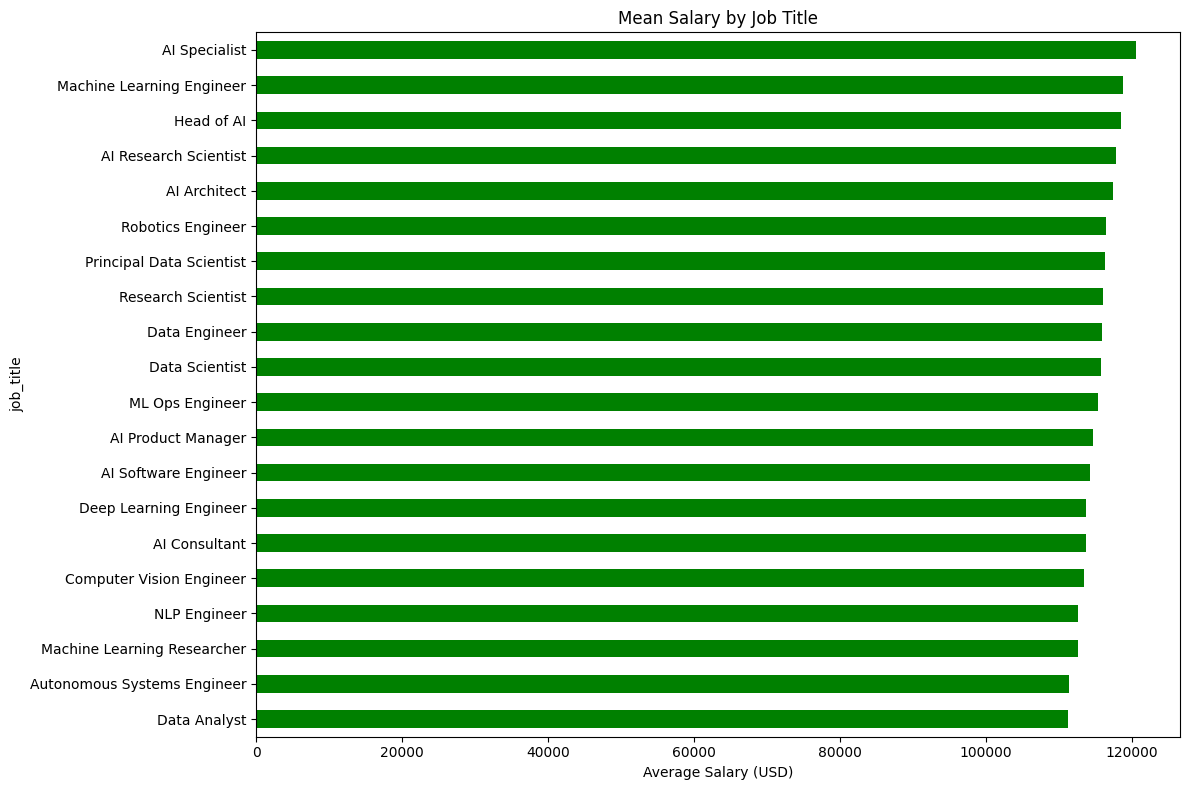

In [168]:
plt.figure(figsize=(12, 8))
mean_salary_by_jobtitle.head(20).plot(kind='barh', color='green')  # Top 20
plt.xlabel("Average Salary (USD)")
plt.title("Mean Salary by Job Title")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

From the countplot AND DATA ANALYSIS, I can see that all jobs have relatively similar mean salaries. This can suggest that job title may not strongly influence salary. We can check this later using feature importance.

# Feature Engineering

In [169]:
df['number_of_req_skills'] = df['required_skills'].apply(lambda x: len([skill.strip() for skill in x.split(',') if skill.strip()]))

Instead of OHE required_skills which has 14315 unique values -> causes high cardinality and give alot of columns which can affect model performance, 
Instead grouping the number of them required for each job makes more sense. We also do not need to drop what might be an important variable. 

Correlation matrix can be used to look at correlation between the numerical predictors and the taget

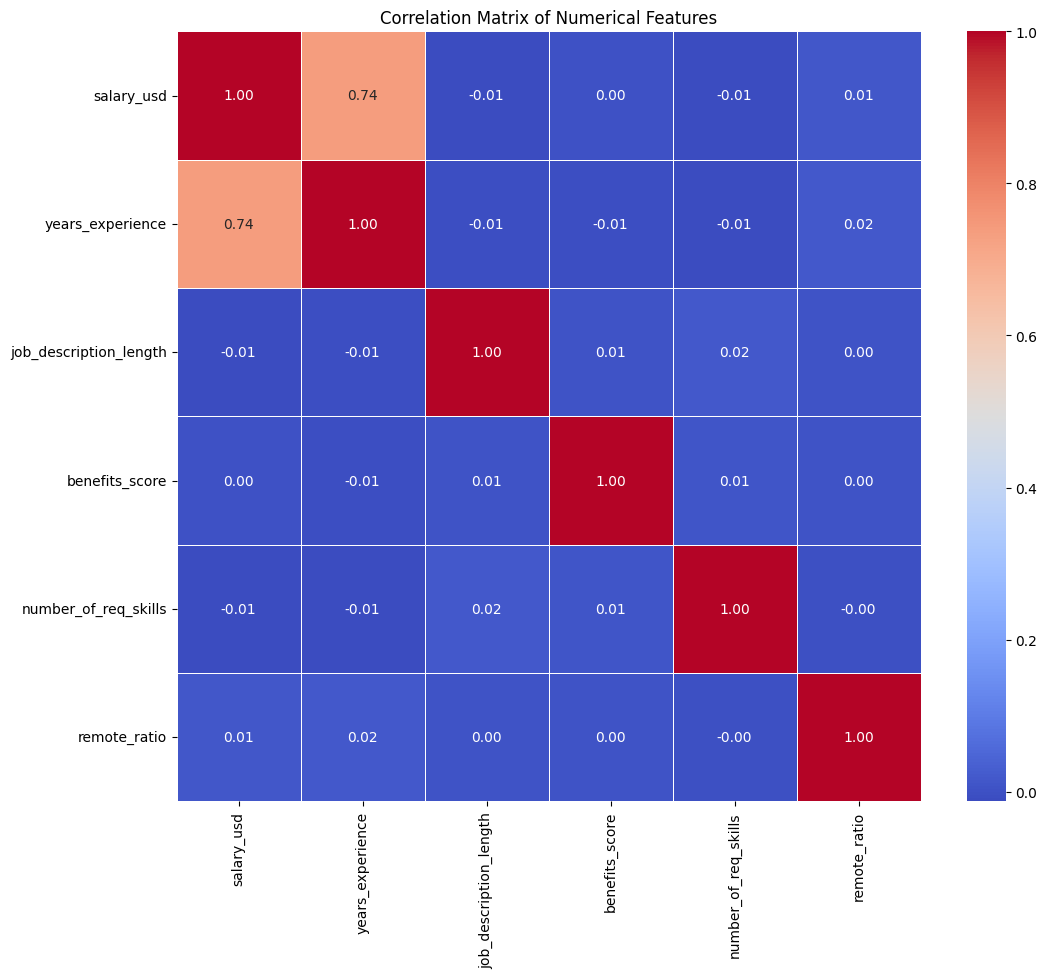

In [170]:
numerical_df = df[["salary_usd","years_experience","job_description_length", "benefits_score","number_of_req_skills","remote_ratio"]].copy()

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()



What I see is in the numerical columns, years_experience has the greatest amout of correlation. While the rest of it are not correlated at all.
However, I will not drop them because they still might not be entirely useless and still play a part when predicting it with other factors.
Hence, i will keep them and do feature importance and test if they truly affect rmse and performance.

# Dropping Unneccessary columns

Firstly we must decide what we want to do with all the columns. Whether they are useful when predicting salary

In [171]:
df.dtypes
# job_id -> drop, Not useful at all to salary

# job title -> keep for OHE, might have some correlation but not very strong

# salary is the target we are predicting already 

# salary currency -> drop, Not useful after converting all salaries to USD it is irrelevant for prediction.

# experience level -> Must Keep,  has a strong positive correlation with salary, is an important factor

# employment type -> Keep, weak correlation but can keep as it may be a useful predictor with other factors

# company_location -> keep, has a high positive correlation with salary

# company size -> keep, has a positive correlation with salary.

# employment type (4 types) use OHE as no natural order

# employee residence (20) use OHE as no natural order

# remote ratio already int no need to encode
# required skills will be dropped due to high cardinality --> too many unique values
# number_of_req_skills -> keep, 
# posting date -> drop, not useful 
# application deadline -> drop, not useful
# job description length -> drop , not useful
# benefits score -> keep, low correlation might still be useful
# company_name -> drop, low correlation with salary, high cardinality

job_id                     object
job_title                  object
salary_usd                  int64
salary_currency            object
experience_level           object
employment_type            object
company_location           object
company_size               object
employee_residence         object
remote_ratio                int64
required_skills            object
education_required         object
years_experience            int64
industry                   object
posting_date               object
application_deadline       object
job_description_length      int64
benefits_score            float64
company_name               object
number_of_req_skills        int64
dtype: object

Drop the not useful columns

In [172]:
df = df.drop('job_id',axis=1)
df = df.drop(['posting_date','application_deadline','salary_currency','company_name','job_description_length','required_skills'],axis=1)


# Feature Engineering 2

Next, to prevent creating too much feature space used later in the model which can cause overfitting. Instead of repeatedly doing  OHE, which can cause curse of dimensionality to columns with high cardinality I used Ordinal Encoding for certain variables that have a natural order or ranking. 

example:  Associate < Bachelor < Master < PhD.

For my case I have 3 columns that can use ordinal encoding.
company size , education required and experience level. They all have a natural order or ranking.

In [173]:
df['company_size_encoded'] = df['company_size'].map({'S':0, 'M':1, 'L':2})

# Encode company_size from S,M,L to 0,1,2 , convert obj to int for model
# I used this over OHE as values in company_size has natural order and also not to overbloat the number of columns. 

In [174]:
df['experience_level_encoded'] = df['experience_level'].map({'EN':0, 'MI':1, 'SE':2, 'EX':3})

# I used this over OHE as values in experience_level has natural order and also not to overbloat the number of columns. 

In [175]:
df['education_required_encoded'] = df['education_required'].map({'Associate':0, 'Bachelor':1, 'Master':2, 'PhD':3})

# I used this over OHE as values in education_required has natural order and also not to overbloat the number of columns. 

In [176]:
df = df.drop(['company_size','experience_level','education_required'],axis = 1)
# Drop the original columns

In [177]:

df = pd.get_dummies(df,columns=['job_title','employment_type','company_location','employee_residence','industry'])


X = df.drop('salary_usd', axis=1)  
y = df['salary_usd']

X_columns = X.columns.tolist()
import joblib
joblib.dump(X_columns, "model_columns.pkl")

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state = 8)


# Model Training

The models that I will be exploring are:
1. Linear Regression - simple baseline model
2. Decision Tree Regressor - Captures non-linear patterns and is a powerful model that can achieve high accuracy
3. Random Forest Regressor - Averages the multiple trees, more robust estimate
4. GradientBoostingRegressor - ensemble learning algorithm, learns from the previous iteration and boosts weak learners, achieves high accuracy
5. Extra Trees Regressor -Faster training time, uses randomness to construct an ensemble of trees.

They each have their own strengths and testing a handful of them is important for me to see how well it performs on salary prediction.

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor


rfr= RandomForestRegressor()
lr = LinearRegression()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
etr = ExtraTreesRegressor()

rfr.fit(X_train,y_train)
lr.fit(X_train , y_train)
dtr.fit(X_train, y_train)
gbr.fit(X_train,y_train)
etr.fit(X_train,y_train)




ExtraTreesRegressor()


The 5 Models that I will be testing will be based on MAE, RMSE and R2 . MAE is to find the absolute average error while RMSE is to factor in outliers more. This is also due to the fact when doing EDA, there are alot of outliers present so RMSE is a must. R² measures how well the regression model explains the variability of the target variable.

In [179]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score




In [180]:
# Linear Regression
lr_preds = lr.predict(X_test)
lr_mae = np.mean(np.abs(lr.predict(X_test) - y_test))
lr_rmse = np.sqrt(np.mean((lr.predict(X_test) - y_test) ** 2))
lr_r2 = r2_score(y_test, lr_preds)


# Decision Tree Regressor
dtr_preds = dtr.predict(X_test)
dtr_mae = np.mean(np.abs(dtr.predict(X_test) - y_test))
dtr_rmse = np.sqrt(np.mean((dtr.predict(X_test) - y_test) ** 2))
dtr_r2 = r2_score(y_test, dtr_preds)



# Random Forest Regressor
rfr_preds = rfr.predict(X_test)
rfr_mae = np.mean(np.abs(rfr.predict(X_test) - y_test))
rfr_rmse = np.sqrt(np.mean((rfr.predict(X_test) - y_test) ** 2))
rfr_r2 = r2_score(y_test, rfr_preds)



# Gradient Boosting Regressor
gbr_preds = gbr.predict(X_test)
gbr_mae = np.mean(np.abs(gbr.predict(X_test) - y_test))
gbr_rmse = np.sqrt(np.mean((gbr.predict(X_test) - y_test) ** 2))
gbr_r2 = r2_score(y_test, gbr_preds)



# Extra Trees Regressor
etr_preds = etr.predict(X_test)
etr_mae = np.mean(np.abs(etr.predict(X_test) - y_test))
etr_rmse = np.sqrt(np.mean((etr.predict(X_test) - y_test) ** 2))
etr_r2 = r2_score(y_test, etr_preds)




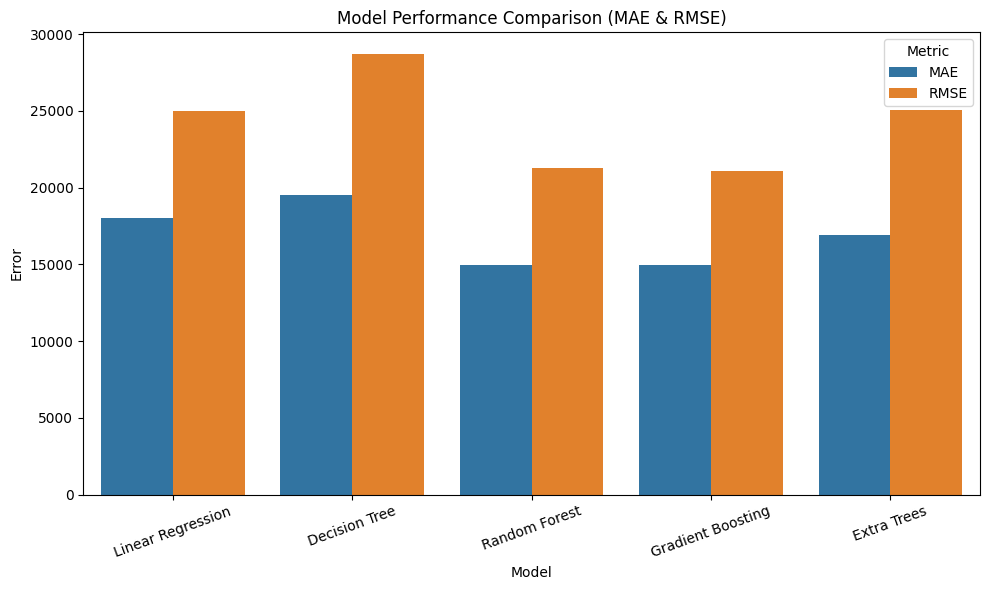

In [181]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Extra Trees']
mae_scores = [lr_mae, dtr_mae, rfr_mae, gbr_mae, etr_mae]
rmse_scores = [lr_rmse, dtr_rmse, rfr_rmse, gbr_rmse, etr_rmse]

# Create DataFrame
df_scores = pd.DataFrame({
    'Model': models,
    'MAE': mae_scores,
    'RMSE': rmse_scores
})

# Melt for seaborn
df_melted = df_scores.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric')
plt.xticks(rotation=20)
plt.title('Model Performance Comparison (MAE & RMSE)')
plt.ylabel('Error')
plt.tight_layout()
plt.show()

Highest to lowest error: DTR , ETR , LR, RFR, GBR

In [182]:
print(f"{'Model':<35}{'MAE':<15}{'RMSE':<15}{'R²':<10}")
print("-" * 75)
print(f"{'Linear Regression':<35}{lr_mae:<15.2f}{lr_rmse:<15.2f}{lr_r2:<10.4f}")
print(f"{'Decision Tree Regressor':<35}{dtr_mae:<15.2f}{dtr_rmse:<15.2f}{dtr_r2:<10.4f}")
print(f"{'Random Forest Regressor':<35}{rfr_mae:<15.2f}{rfr_rmse:<15.2f}{rfr_r2:<10.4f}")
print(f"{'Gradient Boosting Regressor':<35}{gbr_mae:<15.2f}{gbr_rmse:<15.2f}{gbr_r2:<10.4f}")
print(f"{'Extra Trees Regressor':<35}{etr_mae:<15.2f}{etr_rmse:<15.2f}{etr_r2:<10.4f}")

Model                              MAE            RMSE           R²        
---------------------------------------------------------------------------
Linear Regression                  18027.21       24987.16       0.8290    
Decision Tree Regressor            19485.81       28680.31       0.7748    
Random Forest Regressor            14933.82       21298.12       0.8758    
Gradient Boosting Regressor        14988.22       21069.08       0.8785    
Extra Trees Regressor              16935.29       25037.36       0.8284    


# Hypertuning Parameters using GridSearchCV

I will not be hypertuning Linear Regression as it has little/no hyperparameters that will really help its model.

In [183]:
from sklearn.model_selection import GridSearchCV

# Hypertuning Decision Tree Regressor

In [184]:

param_grid_dtr ={
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [4, 8, 12],
    'min_samples_leaf': [5, 10, 15],
    'max_features': [None, 'sqrt', 'log2']
} # This is to try each feature with each other

grid_search_dtr  = GridSearchCV(estimator= DecisionTreeRegressor(random_state=8),
                               param_grid = param_grid_dtr,cv=5,
                               scoring ='neg_mean_squared_error',
                               n_jobs=-1 # use all cores for code to run faster
)
# Use gridsearchCV with DTR, and the param grid dtr, score each param
grid_search_dtr.fit(X_train,y_train) #train model

best_params_dtr = grid_search_dtr.best_params_ # best params get saved into variable

print("Best Parameters found for Decision Tree Regressor are:",best_params_dtr)
best_dtr = grid_search_dtr.best_estimator_  # pulls out the actual trained DecisionTree model that used the best parameters.

Best Parameters found for Decision Tree Regressor are: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 15, 'min_samples_split': 4}


Hyperparameters tuning reason : Max depth , this is to control how deep the tree goes. Since my dataset is a moderate size, a max depth of 10,20,30 is enough as I do not want my model to overfit. None allows the tree to expand fully.

Min samples split is to determine the minimum number of samples required to split an internal node. Sample split : 4 allows the tree to split more, while 8 , 12 is to prevent overfitting of the model as it prevents splits unless there is enough data.

Min sample leaf is to set a minimum number of samples required to be at a leaf node. Throguh this, the model will create broader leaves to improve the tree by simplifying it and generalising. min_samples_leaf=5 lets the tree capture more specific patterns while 10, 15 are more generalised patterns

max features reduces variance. Using sqrt and log2 reduces the number of features looked at per node. None uses all features, which may give better accuracy but might cause overfitting,



In [185]:
y_pred = best_dtr.predict(X_test)
best_dtr_mae =  mean_absolute_error(y_test, y_pred)
best_dtr_rmse = root_mean_squared_error(y_test,y_pred)
best_dtr_r2 = r2_score(y_test, y_pred)

In [186]:
print(f"{'Model':<40}{'MAE':<15}{'RMSE':<15}{'R²'}")
print("-" * 85)
print(f"{'Original Decision Tree':<40}{dtr_mae:<15.2f}{dtr_rmse:<15.2f}{dtr_r2:.4f}")
print(f"{'Best Tuned DTR (GridSearchCV)':<40}{best_dtr_mae:<15.2f}{best_dtr_rmse:<15.2f}{best_dtr_r2:.4f}")

print("\nMAE Improvement:", round(dtr_mae - best_dtr_mae, 2))
print("RMSE Improvement:", round(dtr_rmse - best_dtr_rmse, 2))
print("R² Improvement:", round(best_dtr_r2 - dtr_r2, 4))

Model                                   MAE            RMSE           R²
-------------------------------------------------------------------------------------
Original Decision Tree                  19485.81       28680.31       0.7748
Best Tuned DTR (GridSearchCV)           14861.01       21187.60       0.8771

MAE Improvement: 4624.8
RMSE Improvement: 7492.71
R² Improvement: 0.1023


# Over/UnderFitting test

In [187]:
y_train_pred = best_dtr.predict(X_train)
y_test_pred = best_dtr.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 18708.597889863864
Test RMSE: 21187.599825829006


DTR model does not over/underfit as their train and test error are close to each other.

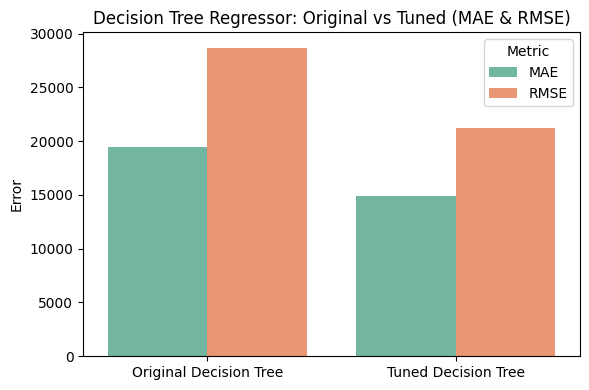

In [188]:
models = ['Original Decision Tree', 'Tuned Decision Tree']
mae_scores = [dtr_mae, best_dtr_mae]
rmse_scores = [dtr_rmse, best_dtr_rmse]

df_scores = pd.DataFrame({
    'Model': models,
    'MAE': mae_scores,
    'RMSE': rmse_scores
})

df_melted = df_scores.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='Set2')
plt.title('Decision Tree Regressor: Original vs Tuned (MAE & RMSE)')
plt.ylabel('Error')
plt.xlabel('')
plt.tight_layout()
plt.show()

# Hypertuning Gradient Boosting Regressor

In [189]:


param_grid_gbr = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [5, 10,20],
    'min_samples_leaf': [10, 25]
}

grid_search_gbr = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=8),
    param_grid=param_grid_gbr,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1 # use all cores for code to run faster
)

grid_search_gbr.fit(X_train, y_train)

best_params_gbr = grid_search_gbr.best_params_

print("Best Parameters found for Gradient Boosting Regressor are:",best_params_gbr)

best_gbr = grid_search_gbr.best_estimator_


Best Parameters found for Gradient Boosting Regressor are: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 25, 'min_samples_split': 5, 'n_estimators': 300}


Reason for hypertune parameters: 100,300 n estimators - I chose 100 and 300 trees to balance between model complexity and training time. Too few trees can underfit, while too many may overfit or take excessive time to train.

0.01,0.1,0.2 learning rate- learning rate controls how much each tree corrects the previous one. The lower the learning rate, the more my model might improve at a cost of slower time. Fast learning rate may miss out optimal solutions which can cause poorer model performance

Max depth, how deep each tree can grow. max_depth = 3 prevents overfitting while 5 and 10 are to learn more complex attributes

Min samples split is to determine the minimum number of samples required to split a node. Sample split : 5 allows the tree to split more, while 10 , 20 is to prevent overfitting of the model as it prevents splits unless there is enough data.

Min sample leaf is to set a minimum number of samples required to be at a leaf node. Through this, the model will create broader leaves to improve the tree by simplifying it and generalising. min_samples_leaf=8 lets the tree capture more specific patterns while 15, 20 are more generalised patterns

# Test for Over/Underfitting

In [190]:
y_train_pred = best_gbr.predict(X_train)
y_test_pred = best_gbr.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 19124.97807526828
Test RMSE: 20120.917552708288


In [191]:
y_pred = best_gbr.predict(X_test)
best_gbr_mae =np.mean(np.abs(best_gbr.predict(X_test) - y_test))
best_gbr_rmse = best_gbr_rmse = np.sqrt(np.mean((best_gbr.predict(X_test) - y_test) ** 2))
best_gbr_r2 = r2_score(y_test, y_pred)

In [192]:
print(f"{'Model':<45}{'MAE':<15}{'RMSE':<15}{'R²'}")
print("-" * 85)
print(f"{'Original Gradient Boosting Regressor':<45}{gbr_mae:<15.2f}{gbr_rmse:<15.2f}{gbr_r2:.4f}")
print(f"{'Best Tuned GBR (GridSearchCV)':<45}{best_gbr_mae:<15.2f}{best_gbr_rmse:<15.2f}{best_gbr_r2:.4f}")

print("\nMAE Improvement:", round(gbr_mae - best_gbr_mae, 2))
print("RMSE Improvement:", round(gbr_rmse - best_gbr_rmse, 2))
print("R² Improvement:", round(best_gbr_r2 - gbr_r2, 4))

Model                                        MAE            RMSE           R²
-------------------------------------------------------------------------------------
Original Gradient Boosting Regressor         14988.22       21069.08       0.8785
Best Tuned GBR (GridSearchCV)                14458.11       20120.92       0.8891

MAE Improvement: 530.1
RMSE Improvement: 948.17
R² Improvement: 0.0107


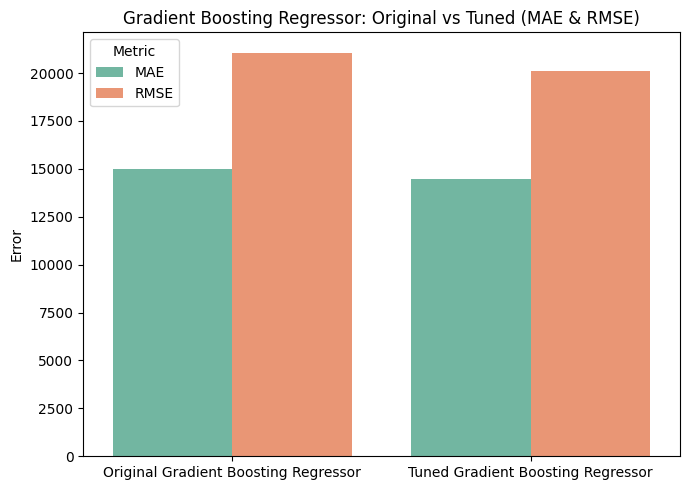

In [193]:
models = ['Original Gradient Boosting Regressor', 'Tuned Gradient Boosting Regressor']
mae_scores = [gbr_mae, best_gbr_mae]
rmse_scores = [gbr_rmse, best_gbr_rmse]

df_scores = pd.DataFrame({
    'Model': models,
    'MAE': mae_scores,
    'RMSE': rmse_scores
})

df_melted = df_scores.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='Set2')
plt.title('Gradient Boosting Regressor: Original vs Tuned (MAE & RMSE)')
plt.ylabel('Error')
plt.xlabel('')
plt.tight_layout()
plt.show()

# Hypertuning Random Forest Regressor

In [194]:
from sklearn.ensemble import RandomForestRegressor

param_grid_rfr = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5,10],
    'min_samples_leaf': [1,2,5],
    'max_features': ['sqrt', 'log2']
}

grid_search_rfr = GridSearchCV(
    estimator=RandomForestRegressor(random_state=8),
    param_grid=param_grid_rfr,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search_rfr.fit(X_train, y_train)
best_params_etr = grid_search_rfr.best_params_ # best params get saved into variable
print("Best Parameters found for Random Forest Regressor are:",best_params_etr)


best_rfr = grid_search_rfr.best_estimator_

Best Parameters found for Random Forest Regressor are: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}


Hyperparameters tuning reason : 100,300,500 n estimators - I chose 100,300,500 trees to balance between model complexity and training time. Too few trees can underfit, while too many may overfit or take excessive time to train.

Max depth , this is to control how deep the tree goes. Since my dataset is a moderate size large, a max depth of 10,20,30 is enough as I do not want my model to overfit. None allows the tree to expand fully.

Min samples split is to determine the minimum number of samples required to split an internal node. Sample split : 2 allows the tree to split more, while 5 , 10 is to prevent overfitting of the model as it prevents splits unless there is enough data.

Min sample leaf is to set a minimum number of samples required to be at a leaf node. Throguh this, the model will create broader leaves to improve the tree by simplifying it and generalising. min_samples_leaf=5 lets the tree capture more specific patterns while 10, 15 are more generalised patterns

max features reduces variance. Using sqrt and log2 reduces the number of features looked at per node. 

# Test if under/overfitting

In [215]:
y_train_pred = best_rfr.predict(X_train)
y_test_pred = best_rfr.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 13039.849285022043
Test RMSE: 21463.947831577803


In [195]:
y_pred = best_rfr.predict(X_test)
best_rfr_mae = mean_absolute_error(y_test, y_pred)
best_rfr_rmse = root_mean_squared_error(y_test,y_pred)
best_rfr_r2 = r2_score(y_test, y_pred)

In [196]:
print(f"{'Model':<35}{'MAE':<17}{'RMSE':<15}{'R²'}")
print("-" * 75)
print(f"{'Original Random Forest Regressor':<35}{rfr_mae:<15.2f}{rfr_rmse:<15.2f}{dtr_r2:.4f}")
print(f"{'Best Tuned RFR(GridSearchCV)':<35}{best_rfr_mae:<15.2f}{best_rfr_rmse:<15.2f}{best_dtr_r2:.4f}")

print("\n MAE Improvement:", round(rfr_mae - best_rfr_mae, 2))
print("RMSE Improvement:", round(rfr_rmse - best_rfr_rmse, 2))
print("R² Improvement:", round(best_rfr_r2 - rfr_r2, 4))

Model                              MAE              RMSE           R²
---------------------------------------------------------------------------
Original Random Forest Regressor   14933.82       21298.12       0.7748
Best Tuned RFR(GridSearchCV)       15244.18       21463.95       0.8771

 MAE Improvement: -310.36
RMSE Improvement: -165.82
R² Improvement: -0.0019


For RFR , RMSE, MAE, R2 actually increased. This could be due to randomization affecting the prediction

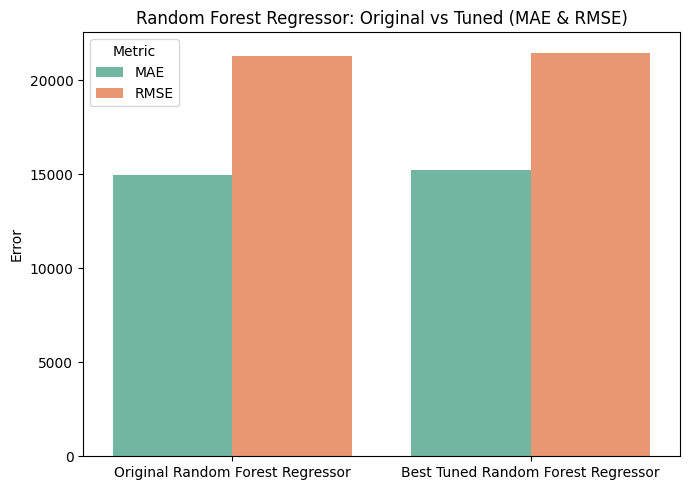

In [197]:
models = ['Original Random Forest Regressor', 'Best Tuned Random Forest Regressor']
mae_scores = [rfr_mae, best_rfr_mae]
rmse_scores = [rfr_rmse, best_rfr_rmse]

df_scores = pd.DataFrame({
    'Model': models,
    'MAE': mae_scores,
    'RMSE': rmse_scores
})

df_melted = df_scores.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='Set2')
plt.title('Random Forest Regressor: Original vs Tuned (MAE & RMSE)')
plt.ylabel('Error')
plt.xlabel('')
plt.tight_layout()
plt.show()

# Hypertuning Extra Trees Regressor

In [198]:

param_grid_etr = {
    'n_estimators': [100, 300,500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_search_etr = GridSearchCV(
    estimator=ExtraTreesRegressor(random_state=8),
    param_grid=param_grid_etr,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search_etr.fit(X_train, y_train)

best_params_etr = grid_search_etr.best_params_ # best params get saved into variable
print("Best Parameters found for Extra Tree Regressor are:",best_params_etr)


best_etr = grid_search_etr.best_estimator_

Best Parameters found for Extra Tree Regressor are: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


Hyperparameters tuning reason : Max depth , this is to control how deep the tree goes. Since my dataset is a moderate size large, a max depth of 10,20 is enough as I do not want my model to overfit. None allows the tree to expand fully.

Min samples split is to determine the minimum number of samples required to split an internal node. Sample split : 2 allows the tree to split more, while 5 , 10 is to prevent overfitting of the model as it prevents splits unless there is enough data.

Min sample leaf is to set a minimum number of samples required to be at a leaf node. Throguh this, the model will create broader leaves to improve the tree by simplifying it and generalising. min_samples_leaf=5 lets the tree capture more specific patterns while 10, 15 are more generalised patterns

max features reduces variance. Using sqrt and log2 reduces the number of features looked at per node. 

# Test if Over/UnderFitting

In [216]:
y_train_pred = best_etr.predict(X_train)
y_test_pred = best_etr.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 13511.119555323283
Test RMSE: 21628.71638436044


In [199]:
y_pred = best_etr.predict(X_test)
best_etr_mae = mean_absolute_error(y_test, y_pred)
best_etr_rmse = root_mean_squared_error(y_test,y_pred)
best_etr_r2 = r2_score(y_test, y_pred)

In [200]:
print(f"{'Model':<35}{'MAE':<15}{'RMSE':<15}{'R²'}")
print("-" * 70)
print(f"{'Original Extra Trees Regressor':<35}{etr_mae:<15.2f}{etr_rmse:<15.2f}{etr_r2:.4f}")
print(f"{'Best Tuned ETR(GridSearchCV)':<35}{best_etr_mae:<15.2f}{best_etr_rmse:<15.2f}{best_etr_r2:.4f}")

print("\n MAE Improvement:", round(etr_mae - best_etr_mae, 2))
print("RMSE Improvement:", round(etr_rmse - best_etr_rmse, 2))
print("R² Improvement:", round(best_etr_r2 - etr_r2, 4))

Model                              MAE            RMSE           R²
----------------------------------------------------------------------
Original Extra Trees Regressor     16935.29       25037.36       0.8284
Best Tuned ETR(GridSearchCV)       15202.48       21628.72       0.8719

 MAE Improvement: 1732.81
RMSE Improvement: 3408.64
R² Improvement: 0.0436


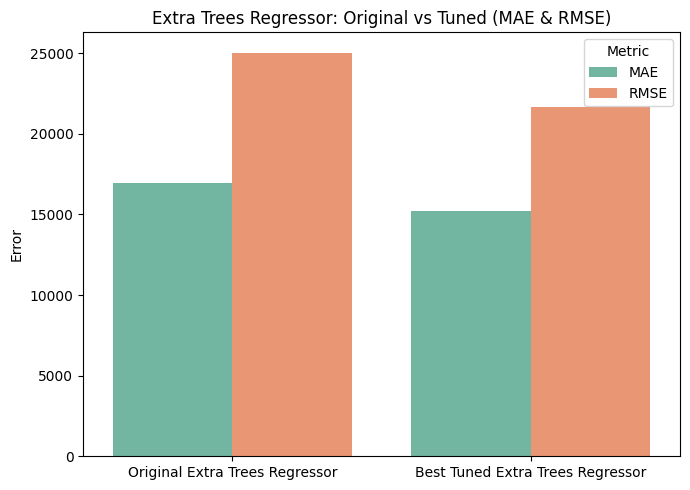

In [201]:
models = ['Original Extra Trees Regressor', 'Best Tuned Extra Trees Regressor']
mae_scores = [etr_mae, best_etr_mae]
rmse_scores = [etr_rmse, best_etr_rmse]

df_scores = pd.DataFrame({
    'Model': models,
    'MAE': mae_scores,
    'RMSE': rmse_scores
})

df_melted = df_scores.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='Set2')
plt.title('Extra Trees Regressor: Original vs Tuned (MAE & RMSE)')
plt.ylabel('Error')
plt.xlabel('')
plt.tight_layout()
plt.show()

In [202]:
models = {
    "Decision Tree (Tuned)": best_dtr,
    "Random Forest (Tuned)": best_rfr,
    "Gradient Boosting (Tuned)": best_gbr,
    "Extra Trees (Tuned)": best_etr
}

results = []

for name, model in models.items():
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    rmse = root_mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R2": round(r2, 3)
    })

df_results = pd.DataFrame(results)

print(df_results)


                       Model       MAE      RMSE     R2
0      Decision Tree (Tuned)  14861.01  21187.60  0.877
1      Random Forest (Tuned)  15244.18  21463.95  0.874
2  Gradient Boosting (Tuned)  14458.11  20120.92  0.889
3        Extra Trees (Tuned)  15202.48  21628.72  0.872


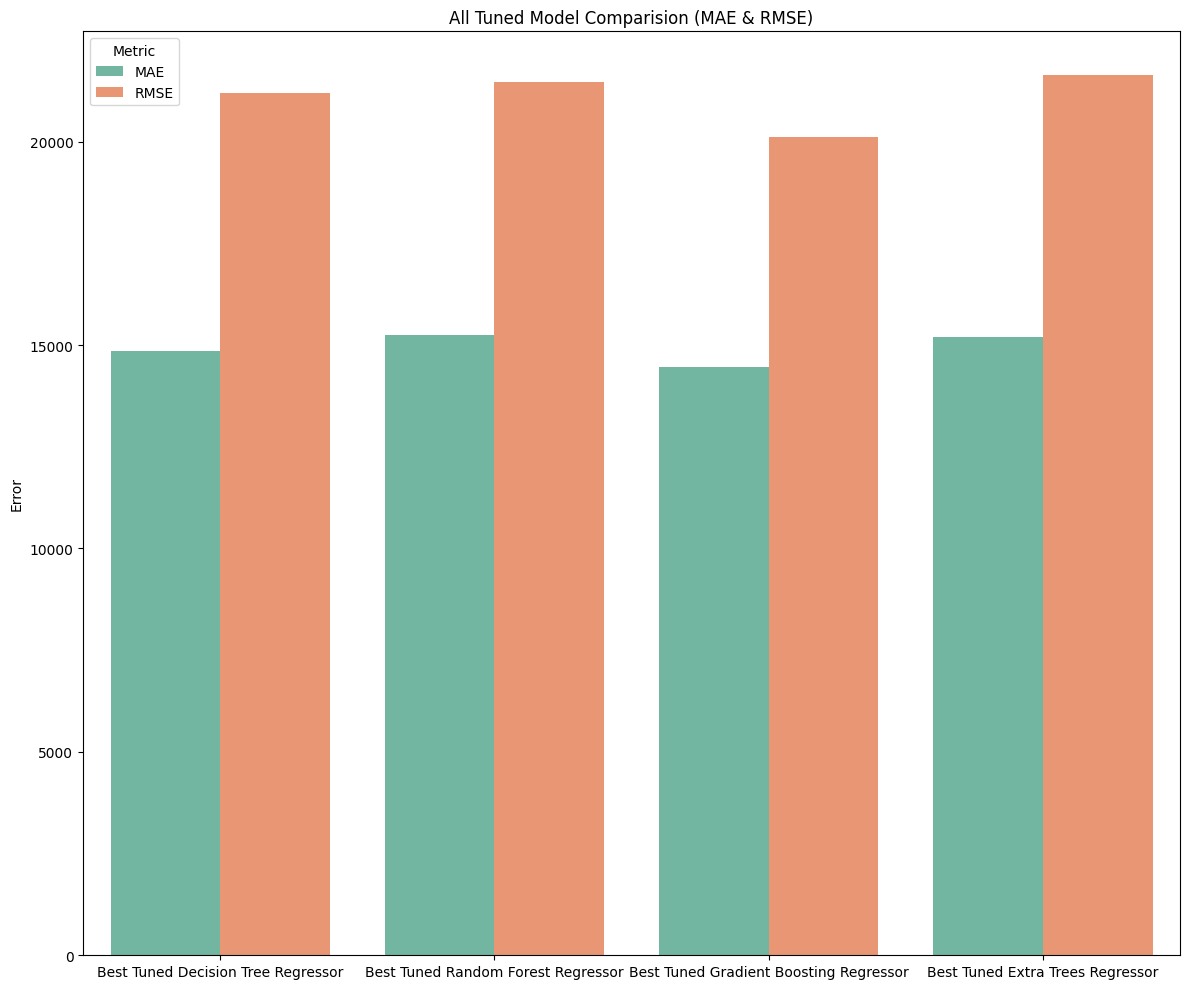

In [203]:
models = ['Best Tuned Decision Tree Regressor','Best Tuned Random Forest Regressor','Best Tuned Gradient Boosting Regressor' ,'Best Tuned Extra Trees Regressor']
mae_scores = [best_dtr_mae, best_rfr_mae, best_gbr_mae, best_etr_mae]
rmse_scores = [best_dtr_rmse, best_rfr_rmse, best_gbr_rmse, best_etr_rmse]

df_scores = pd.DataFrame({
    'Model': models,
    'MAE': mae_scores,
    'RMSE': rmse_scores
})

df_melted = df_scores.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='Set2')
plt.title('All Tuned Model Comparision (MAE & RMSE)')
plt.ylabel('Error')
plt.xlabel('')
plt.tight_layout()
plt.show()

C:\Users\33ugl\AppData\Local\Temp\ipykernel_4228\3429487871.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_r2, x='Model', y='R2 Score', palette='Set2')


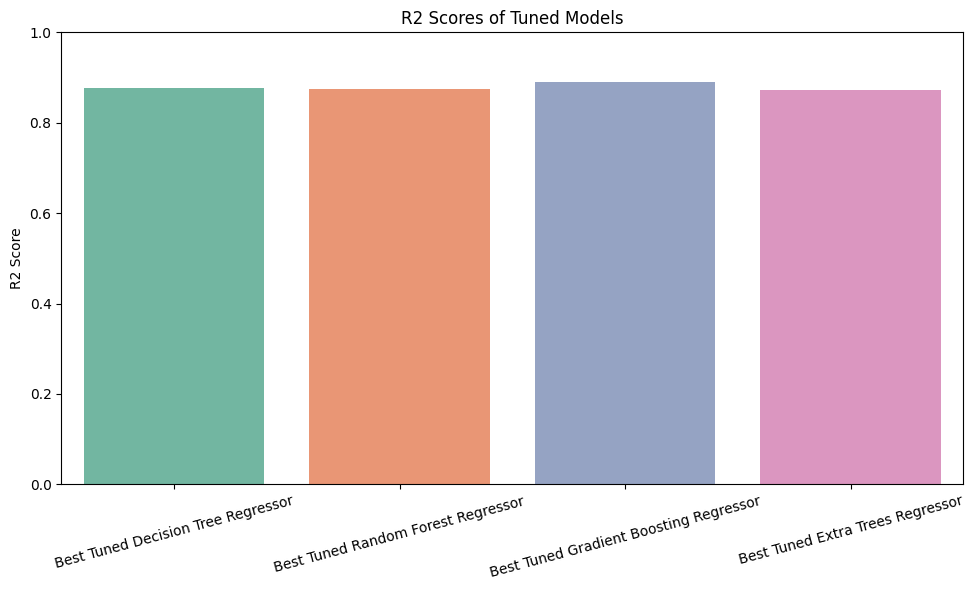

In [204]:
models = [
    'Best Tuned Decision Tree Regressor',
    'Best Tuned Random Forest Regressor',
    'Best Tuned Gradient Boosting Regressor',
    'Best Tuned Extra Trees Regressor'
]

# Calculate R2 scores
r2_scores = [
    r2_score(y_test, best_dtr.predict(X_test)),
    r2_score(y_test, best_rfr.predict(X_test)),
    r2_score(y_test, best_gbr.predict(X_test)),
    r2_score(y_test, best_etr.predict(X_test))
]

df_r2 = pd.DataFrame({
    'Model': models,
    'R2 Score': r2_scores
})

plt.figure(figsize=(10,6))
sns.barplot(data=df_r2, x='Model', y='R2 Score', palette='Set2')
plt.title('R2 Scores of Tuned Models')
plt.ylabel('R2 Score')
plt.xlabel('')
plt.xticks(rotation=15)
plt.ylim(0, 1)  # Assuming all R2 scores are between 0 and 1
plt.tight_layout()
plt.show()

# Conclusion: Best Tuned Model is : Gradient Boosting Regressor
-Lowest MAE and RMSE of 14458.11 and 20120.92 respectfully.
This means that its prediction can deviate by about $20,000 USD if taking to account of RMSE or $15,00 USD for MAE. Deviation of 15,000 - 20,000 USD
It also has the highest R2 score of 0.889 which means that the model explains about 88.9% of the variance in the target variable.

In [205]:
percentage_error = (best_gbr_rmse/df['salary_usd'].mean()) * 100
percentage_acc = 100 - percentage_error
print('Models accuracy is',percentage_acc,'%')

Models accuracy is 82.55648195070475 %


A 18% error is respectable, but can be improved. Maybe finding feature importance and dropping low feature importance could reduce this error

                           Feature  Importance
1                 years_experience    0.434953
5         experience_level_encoded    0.255681
48    company_location_Switzerland    0.058899
4             company_size_encoded    0.047785
35        company_location_Denmark    0.038370
44         company_location_Norway    0.032979
50  company_location_United States    0.017219
32        company_location_Austria    0.013128
42          company_location_Japan    0.012861
41         company_location_Israel    0.012751


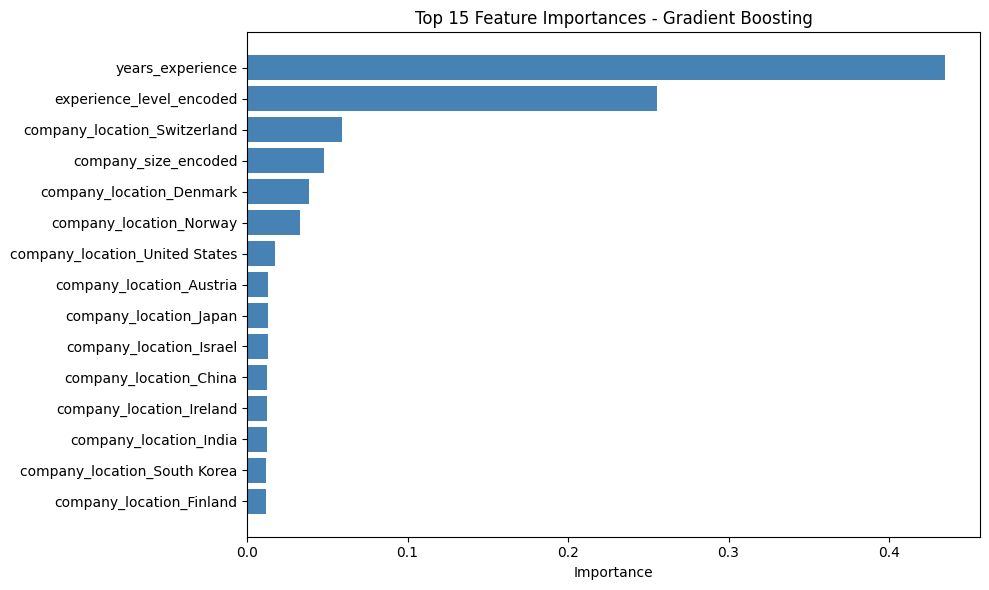

In [206]:
importances = best_gbr.feature_importances_
feature_names = df.drop('salary_usd', axis=1).columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(10))


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:15][::-1], importance_df['Importance'][:15][::-1], color='steelblue')
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances - Gradient Boosting')
plt.tight_layout()
plt.show()


In [207]:
low_importance_df = importance_df[importance_df['Importance'] < 0.01]

print("Low importance features to consider dropping:\n")
for i, row in low_importance_df.iterrows():
    print(f"{row['Feature']:30} Importance: {row['Importance']:.5f}")

Low importance features to consider dropping:

company_location_United Kingdom Importance: 0.00251
company_location_Singapore     Importance: 0.00229
benefits_score                 Importance: 0.00191
company_location_Netherlands   Importance: 0.00165
education_required_encoded     Importance: 0.00075
number_of_req_skills           Importance: 0.00050
company_location_Sweden        Importance: 0.00048
remote_ratio                   Importance: 0.00045
company_location_Germany       Importance: 0.00028
industry_Energy                Importance: 0.00021
job_title_AI Research Scientist Importance: 0.00017
company_location_Australia     Importance: 0.00016
company_location_Canada        Importance: 0.00015
employee_residence_Denmark     Importance: 0.00014
employment_type_FT             Importance: 0.00014
job_title_Machine Learning Researcher Importance: 0.00013
industry_Finance               Importance: 0.00013
employment_type_FL             Importance: 0.00012
industry_Retail           

# Feature importance Test
I will remove low feature importance features: benefits_score, remote_ratio and number_of_req_skills.

df_aft_feature_impt = df.drop('job_id',axis=1)

df_aft_feature_impt = df.drop(['benefits_score','remote_ratio','number_of_req_skills','posting_date','application_deadline','salary_currency','company_name','job_description_length','required_skills'],axis=1)

-------After Model Fitting and Testing---------
| Model             | MAE       | RMSE      |
| ----------------- | --------- | --------- |
| Linear Regression | 18,020.05 | 24,982.38 |
| Decision Tree     | 19,980.72 | 29,610.23 |
| Random Forest     | 15,157.97 | 21,706.63 |
| Gradient Boosting | 14,962.93 | 21,035.35 |
| Extra Trees       | 17,770.20 | 26,151.13 |


| Model                     | MSE            | RMSE      |
| ------------------------- | -------------- | --------- |
| Decision Tree (Tuned)     | 534,457,200.23 | 23,118.33 |
| Random Forest (Tuned)     | 457,507,258.17 | 21,389.42 |
| Gradient Boosting (Tuned) | 403,878,798.66 | 20,096.74 |
| Extra Trees (Tuned)       | 464,203,604.96 | 21,545.38 |




After removing low importance features like benefits_scores, remote_ratio, number_of_req_skills, RMSE did not improve and instead increased. 

Tells me that Low Feature Importance ≠ Zero Contribution

This shows that they are still somewhat important despite low importance. Hence, I will not drop them.

# Test for Over/Underfitting of Model

In [208]:
y_train_pred = best_gbr.predict(X_train)
y_test_pred = best_gbr.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 19124.97807526828
Test RMSE: 20120.917552708288


Since test and train error are about equal for Gradient Boosting Regressor Model, it shows that there is no over or underfitting in the model.
Hencce, I can use this model for my prediction

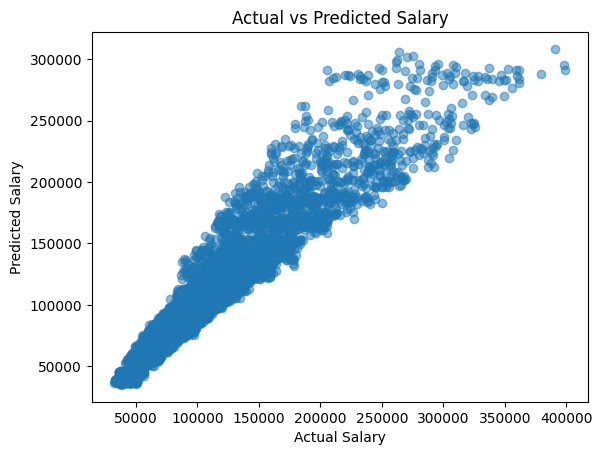

In [209]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

# Prediction

In [210]:
X_columns_after_ohe = df.drop('salary_usd',axis=1).columns
X_columns_after_ohe

Index(['remote_ratio', 'years_experience', 'benefits_score',
       'number_of_req_skills', 'company_size_encoded',
       'experience_level_encoded', 'education_required_encoded',
       'job_title_AI Architect', 'job_title_AI Consultant',
       'job_title_AI Product Manager', 'job_title_AI Research Scientist',
       'job_title_AI Software Engineer', 'job_title_AI Specialist',
       'job_title_Autonomous Systems Engineer',
       'job_title_Computer Vision Engineer', 'job_title_Data Analyst',
       'job_title_Data Engineer', 'job_title_Data Scientist',
       'job_title_Deep Learning Engineer', 'job_title_Head of AI',
       'job_title_ML Ops Engineer', 'job_title_Machine Learning Engineer',
       'job_title_Machine Learning Researcher', 'job_title_NLP Engineer',
       'job_title_Principal Data Scientist', 'job_title_Research Scientist',
       'job_title_Robotics Engineer', 'employment_type_CT',
       'employment_type_FL', 'employment_type_FT', 'employment_type_PT',
       'co

In [211]:
new_data = pd.DataFrame([[
    'NLP Engineer',     # job_title
    'FT',                # employment_type
    'Switzerland',             # company_location
    'India',             # employee_residence
    0,                  # remote_ratio
    4,                 # number_of_req_skills
    1,                   # years_experience
    'Education',         # industry
    2,                 # benefits_score
    'S',                 # company_size
    'SE',                # experience_level
    'PhD'                # education_required
]], columns=[
    'job_title', 'employment_type', 'company_location', 'employee_residence',
    'remote_ratio', 'number_of_req_skills','years_experience', 'industry', 'benefits_score',
    'company_size', 'experience_level', 'education_required'
])


In [212]:
# Map the natural order columns
new_data['company_size_encoded'] = new_data['company_size'].map({'S':0, 'M':1, 'L':2})
new_data['experience_level_encoded'] = new_data['experience_level'].map({'EN':0, 'MI':1, 'SE':2, 'EX':3})
new_data['education_required_encoded'] = new_data['education_required'].map({'Associate':0, 'Bachelor':1, 'Master':2, 'PhD':3})

# Drop natural order label columns
new_data.drop(['company_size', 'experience_level', 'education_required'], axis=1, inplace=True)

# One-hot encode other categorical columns
new_data = pd.get_dummies(new_data)

# Reindex to match training feature columns exactly
new_data = new_data.reindex(X_columns_after_ohe, axis=1, fill_value=0)



In [213]:
# Predict salary
predicted_salary = best_gbr.predict(new_data)
print("Predicted salary:", predicted_salary[0])

Predicted salary: 117740.74179800553


In [214]:
import joblib

# Save the best model after hyperparameter tuning
joblib.dump(best_gbr, "ai_salary_model.pkl")




['ai_salary_model.pkl']